# Forest Cover Type Prediction
### 2. Data Optimization and Modeling
![forest-cover-type-coverimage](https://kaggle2.blob.core.windows.net/competitions/kaggle/3936/logos/front_page.png)
<center>https://www.kaggle.com/c/forest-cover-type-prediction</center>


In [1]:
import random
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from mlxtend.classifier import EnsembleVoteClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.learning_curve import learning_curve
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle

import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import TruncatedSVD

In [3]:
X_scaled_train = pd.read_csv('data/X_scaled_train.csv')
X_scaled_test = pd.read_csv('data/X_scaled_test.csv')

In [4]:
y_train = pd.read_csv('data/train.csv', usecols=['Cover_Type'])

## Optimize data
**Memory Optimization**
* for faster processing like feature selection, model learning, etc.

**Structure Optimization**
* for better performance using `Tree-based model`

In [5]:
X_scaled_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Columns: 326 entries, Aspect to Radians_To_Hydrology_cube
dtypes: float64(326)
memory usage: 37.6 MB


In [6]:
X_scaled_test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565892 entries, 0 to 565891
Columns: 326 entries, Aspect to Radians_To_Hydrology_cube
dtypes: float64(326)
memory usage: 1.4 GB


In [7]:
for col in X_scaled_train.columns:
    if len(X_scaled_train[col].unique()) <= 2:
        X_scaled_train[col] = pd.to_numeric(X_scaled_train[col].astype(int),
                                       downcast='integer')
    else:
        X_scaled_train[col] = pd.to_numeric(X_scaled_train[col],
                                       downcast='float')
    
    if len(X_scaled_test[col].unique()) <= 2:
        X_scaled_test[col] = pd.to_numeric(X_scaled_test[col].astype(int),
                                       downcast='integer')
    else:
        X_scaled_test[col] = pd.to_numeric(X_scaled_test[col],
                                       downcast='float')

In [8]:
X_scaled_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Columns: 326 entries, Aspect to Radians_To_Hydrology_cube
dtypes: float32(229), int8(97)
memory usage: 14.6 MB


In [9]:
X_scaled_test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565892 entries, 0 to 565891
Columns: 326 entries, Aspect to Radians_To_Hydrology_cube
dtypes: float32(229), int8(97)
memory usage: 546.7 MB


## `Soil_Type7` and `Soil_Type15`
* Train set has only one (`0`) class in the `Soil_Type7` and `Soil_Type15` columns
* Test set has two classes (`0`, `1`) in the `Soil_Type7` and `Soil_Type15` columns
* Since our model will not learn the coefficient from the train set given, we drop two columns.

In [10]:
for col in X_scaled_test.columns:
    print(col, len(X_scaled_test[col].unique()))

Aspect 361
Aspect_log 361
Aspect_log_cdf_1 361
Aspect_log_cdf_2 361
Aspect_log_cdf_3 361
Aspect_log_cdf_4 361
Aspect_log_cdf_5 361
Aspect_log_cdf_6 361
Aspect_log_cdf_7 361
Aspect_log_pdf_1 361
Aspect_log_pdf_2 361
Aspect_log_pdf_3 361
Aspect_log_pdf_4 361
Aspect_log_pdf_5 361
Aspect_log_pdf_6 361
Aspect_log_pdf_7 361
Aspect_log_wild_cdf_11 361
Aspect_log_wild_cdf_21 361
Aspect_log_wild_cdf_31 361
Aspect_log_wild_cdf_41 361
Aspect_log_wild_cdf_51 361
Aspect_log_wild_cdf_61 361
Aspect_log_wild_cdf_71 361
Aspect_log_wild_pdf_11 361
Aspect_log_wild_pdf_21 361
Aspect_log_wild_pdf_31 361
Aspect_log_wild_pdf_41 361
Aspect_log_wild_pdf_51 361
Aspect_log_wild_pdf_61 361
Aspect_log_wild_pdf_71 361
Elevation 1974
Elevation_log 1974
Elevation_log_cdf_1 1426
Elevation_log_cdf_2 1732
Elevation_log_cdf_3 1713
Elevation_log_cdf_4 970
Elevation_log_cdf_5 967
Elevation_log_cdf_6 1710
Elevation_log_cdf_7 1013
Elevation_log_pdf_1 1488
Elevation_log_pdf_2 1801
Elevation_log_pdf_3 1855
Elevation_log_pdf_4 

In [11]:
pd.read_csv('data/train.csv', usecols=['Soil_Type7', 'Soil_Type15'])['Soil_Type7'].unique()

array([0], dtype=int64)

In [12]:
pd.read_csv('data/train.csv', usecols=['Soil_Type7', 'Soil_Type15'])['Soil_Type15'].unique()

array([0], dtype=int64)

In [13]:
print(X_scaled_train['Soil_Type7'].unique())
print(X_scaled_train['Soil_Type15'].unique())
print(X_scaled_test['Soil_Type7'].unique())
print(X_scaled_test['Soil_Type15'].unique())

[0]
[0]
[0 1]
[0 1]


In [14]:
X_scaled_train = X_scaled_train.drop(['Soil_Type7', 'Soil_Type15'], axis=1)
X_scaled_test = X_scaled_test.drop(['Soil_Type7', 'Soil_Type15'], axis=1)

## Additional Visualization
* Visualize how newly generated columns categorize values by `Cover_Type`
* If newly generated columns seem no difference to the original, or even worse, drop the columns from dataframe
  * By doing this, we can reduce the amount of time for selecting best feature set.

In [15]:
def scatter_column_range_by_covertype(colnames, rows=2):
    
    f, atrain_dfarr = plt.subplots(rows, 5, figsize=(15, 5*rows))

    for i, col in enumerate(colnames):
        r = 0; c = i
        
        if i < 5: pass
        elif i < 10: r += 1; c = i-5
        elif i < 15: r += 2; c = i-10
        elif i < 20: r += 3; c = i-15
        elif i < 25: r += 4; c = i-20
        elif i < 30: r += 5; c = i-25
            
        atrain_dfarr[r, c].scatter(y_train, X_scaled_train[col])
        atrain_dfarr[r, c].set_title(col)

    plt.subplots_adjust(left=0.1, right=2.0, top=1.0, bottom=0.0)
    plt.show()

In [16]:
def bar_column_range_by_covertype(colnames, rows=2):
    
    f, atrain_dfarr = plt.subplots(rows, 5, figsize=(15, 5*rows))

    for i, col in enumerate(colnames):
        r = 0; c = i
        
        if i < 5: pass
        elif i < 10: r += 1; c = i-5
        elif i < 15: r += 2; c = i-10
        elif i < 20: r += 3; c = i-15
        elif i < 25: r += 4; c = i-20
        elif i < 30: r += 5; c = i-25
            
        atrain_dfarr[r, c].bar(X_scaled_train[col].value_counts().index, X_scaled_train[col].value_counts().values)
        atrain_dfarr[r, c].set_title(col)

    plt.subplots_adjust(left=0.1, right=2.0, top=1.0, bottom=0.0)
    plt.show()

In [17]:
X_scaled_train_withlabel = pd.concat([X_scaled_train, y_train], axis=1)

In [18]:
num_features = ['Elevation', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',\
                         'Horizontal_Distance_To_Fire_Points', 'Aspect', 'Slope', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']

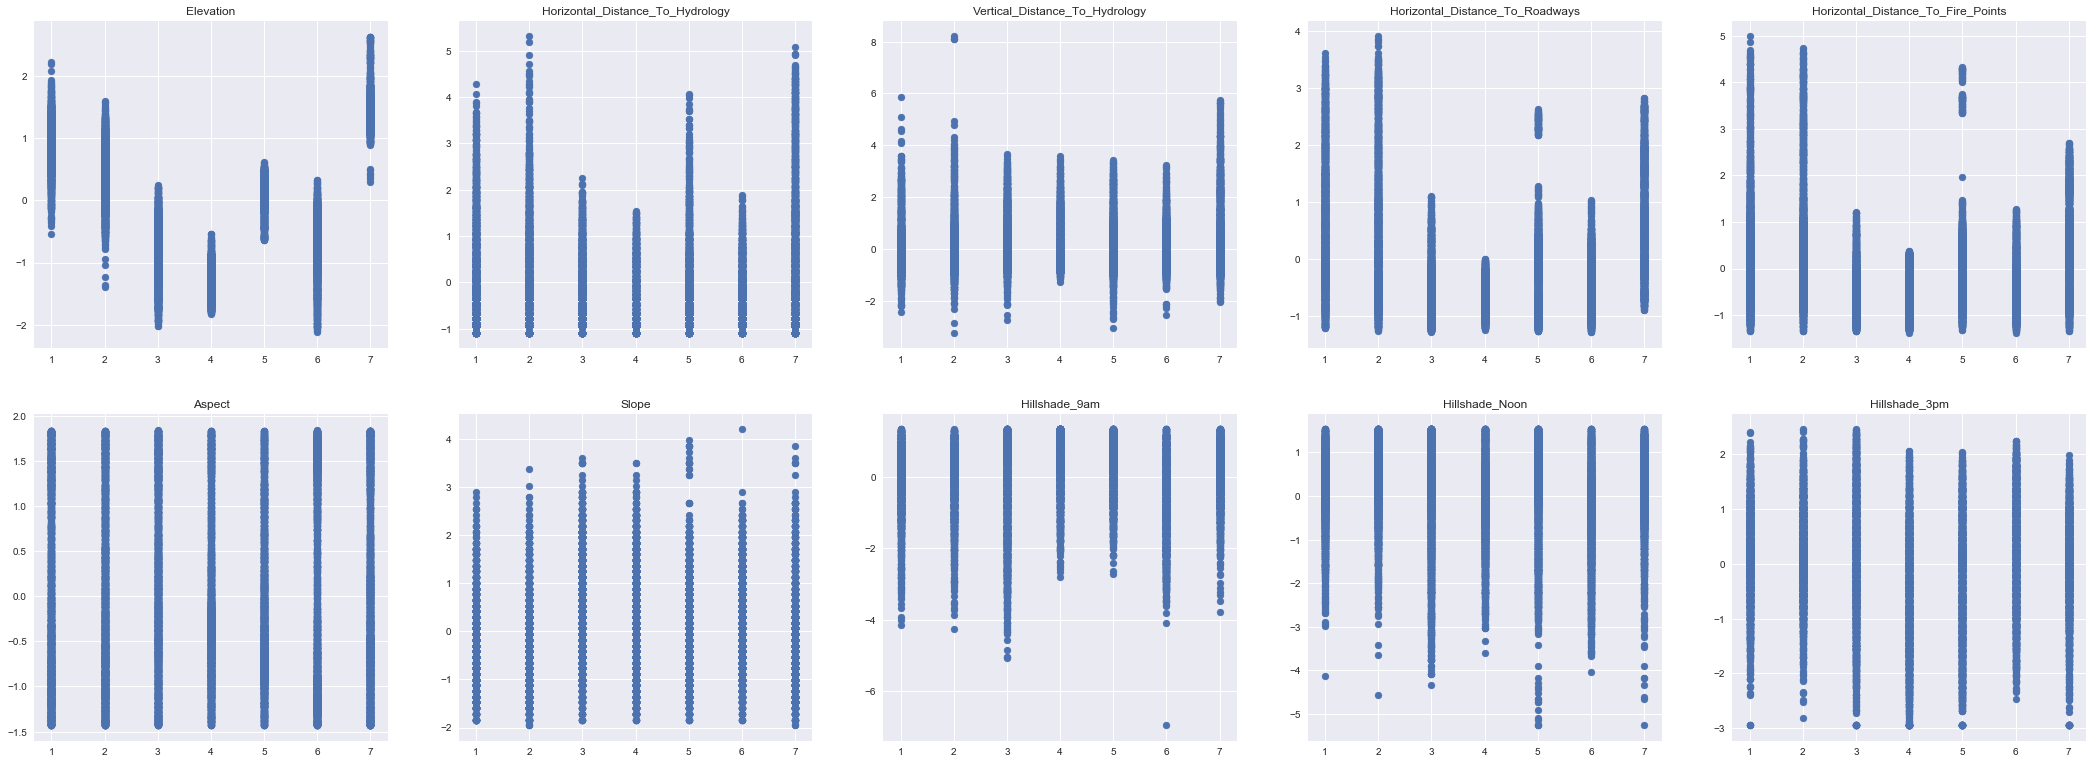

In [19]:
scatter_column_range_by_covertype(num_features)

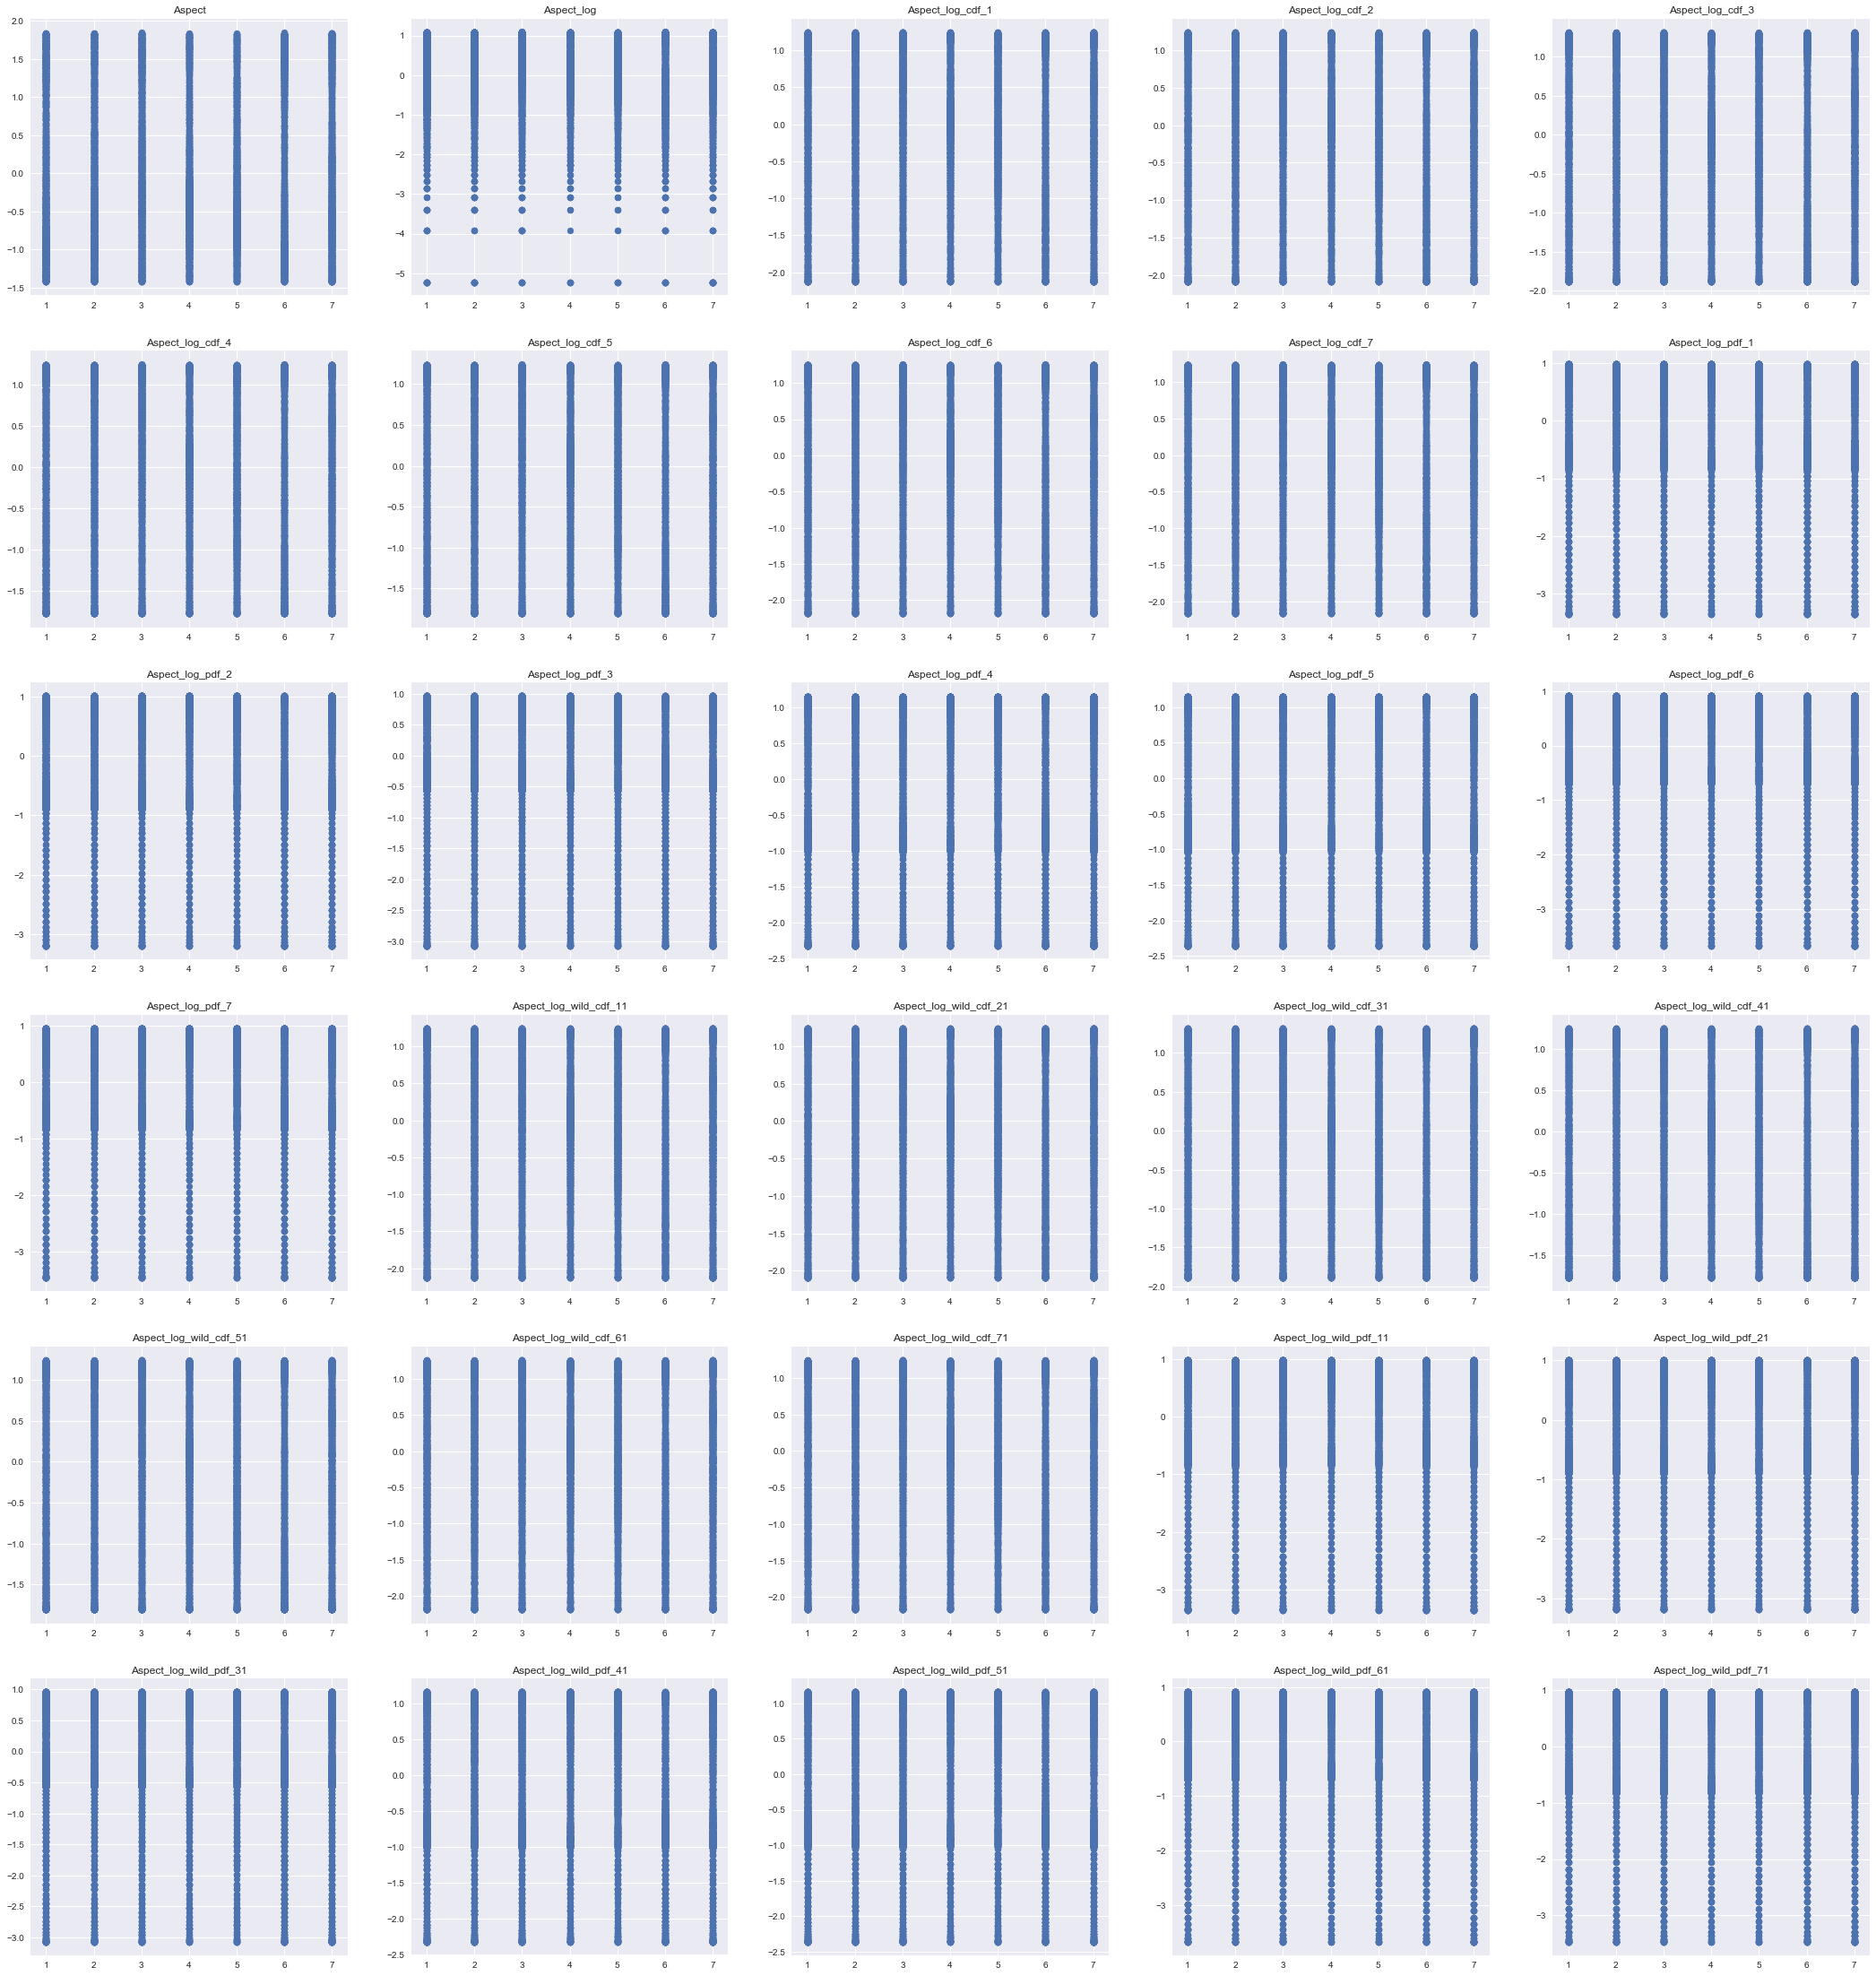

In [20]:
aspect_rel_cols = ['Aspect','Aspect_log','Aspect_log_cdf_1','Aspect_log_cdf_2','Aspect_log_cdf_3',
                 'Aspect_log_cdf_4','Aspect_log_cdf_5','Aspect_log_cdf_6','Aspect_log_cdf_7',
                 'Aspect_log_pdf_1','Aspect_log_pdf_2','Aspect_log_pdf_3','Aspect_log_pdf_4',
                 'Aspect_log_pdf_5','Aspect_log_pdf_6','Aspect_log_pdf_7','Aspect_log_wild_cdf_11',
                 'Aspect_log_wild_cdf_21','Aspect_log_wild_cdf_31','Aspect_log_wild_cdf_41',
                 'Aspect_log_wild_cdf_51','Aspect_log_wild_cdf_61',
                 'Aspect_log_wild_cdf_71',
                 'Aspect_log_wild_pdf_11',
                 'Aspect_log_wild_pdf_21',
                 'Aspect_log_wild_pdf_31',
                 'Aspect_log_wild_pdf_41',
                 'Aspect_log_wild_pdf_51',
                 'Aspect_log_wild_pdf_61',
                 'Aspect_log_wild_pdf_71']

scatter_column_range_by_covertype(aspect_rel_cols, rows=6)

In [21]:
aspect_rel_cols.remove('Aspect')
aspect_rel_cols.remove('Aspect_log')
X_scaled_train = X_scaled_train.drop(aspect_rel_cols, axis=1)
X_scaled_test = X_scaled_test.drop(aspect_rel_cols, axis=1)

In [22]:
elevation_rel_cols = [
 'Elevation', 'Elevation_log',
 'Elevation_log_cdf_1','Elevation_log_cdf_2', 'Elevation_log_cdf_3', 'Elevation_log_cdf_4',
 'Elevation_log_cdf_5', 'Elevation_log_cdf_6', 'Elevation_log_cdf_7', 'Elevation_log_pdf_1',
 'Elevation_log_pdf_2', 'Elevation_log_pdf_3', 'Elevation_log_pdf_4', 'Elevation_log_pdf_5',
 'Elevation_log_pdf_6', 'Elevation_log_pdf_7', 'Elevation_log_wild_cdf_11', 'Elevation_log_wild_cdf_21',
 'Elevation_log_wild_cdf_31', 'Elevation_log_wild_cdf_41', 'Elevation_log_wild_cdf_51', 'Elevation_log_wild_cdf_61',
 'Elevation_log_wild_cdf_71', 'Elevation_log_wild_pdf_11', 'Elevation_log_wild_pdf_21', 'Elevation_log_wild_pdf_31', 
 'Elevation_log_wild_pdf_41', 'Elevation_log_wild_pdf_51', 'Elevation_log_wild_pdf_61', 'Elevation_log_wild_pdf_71'
]

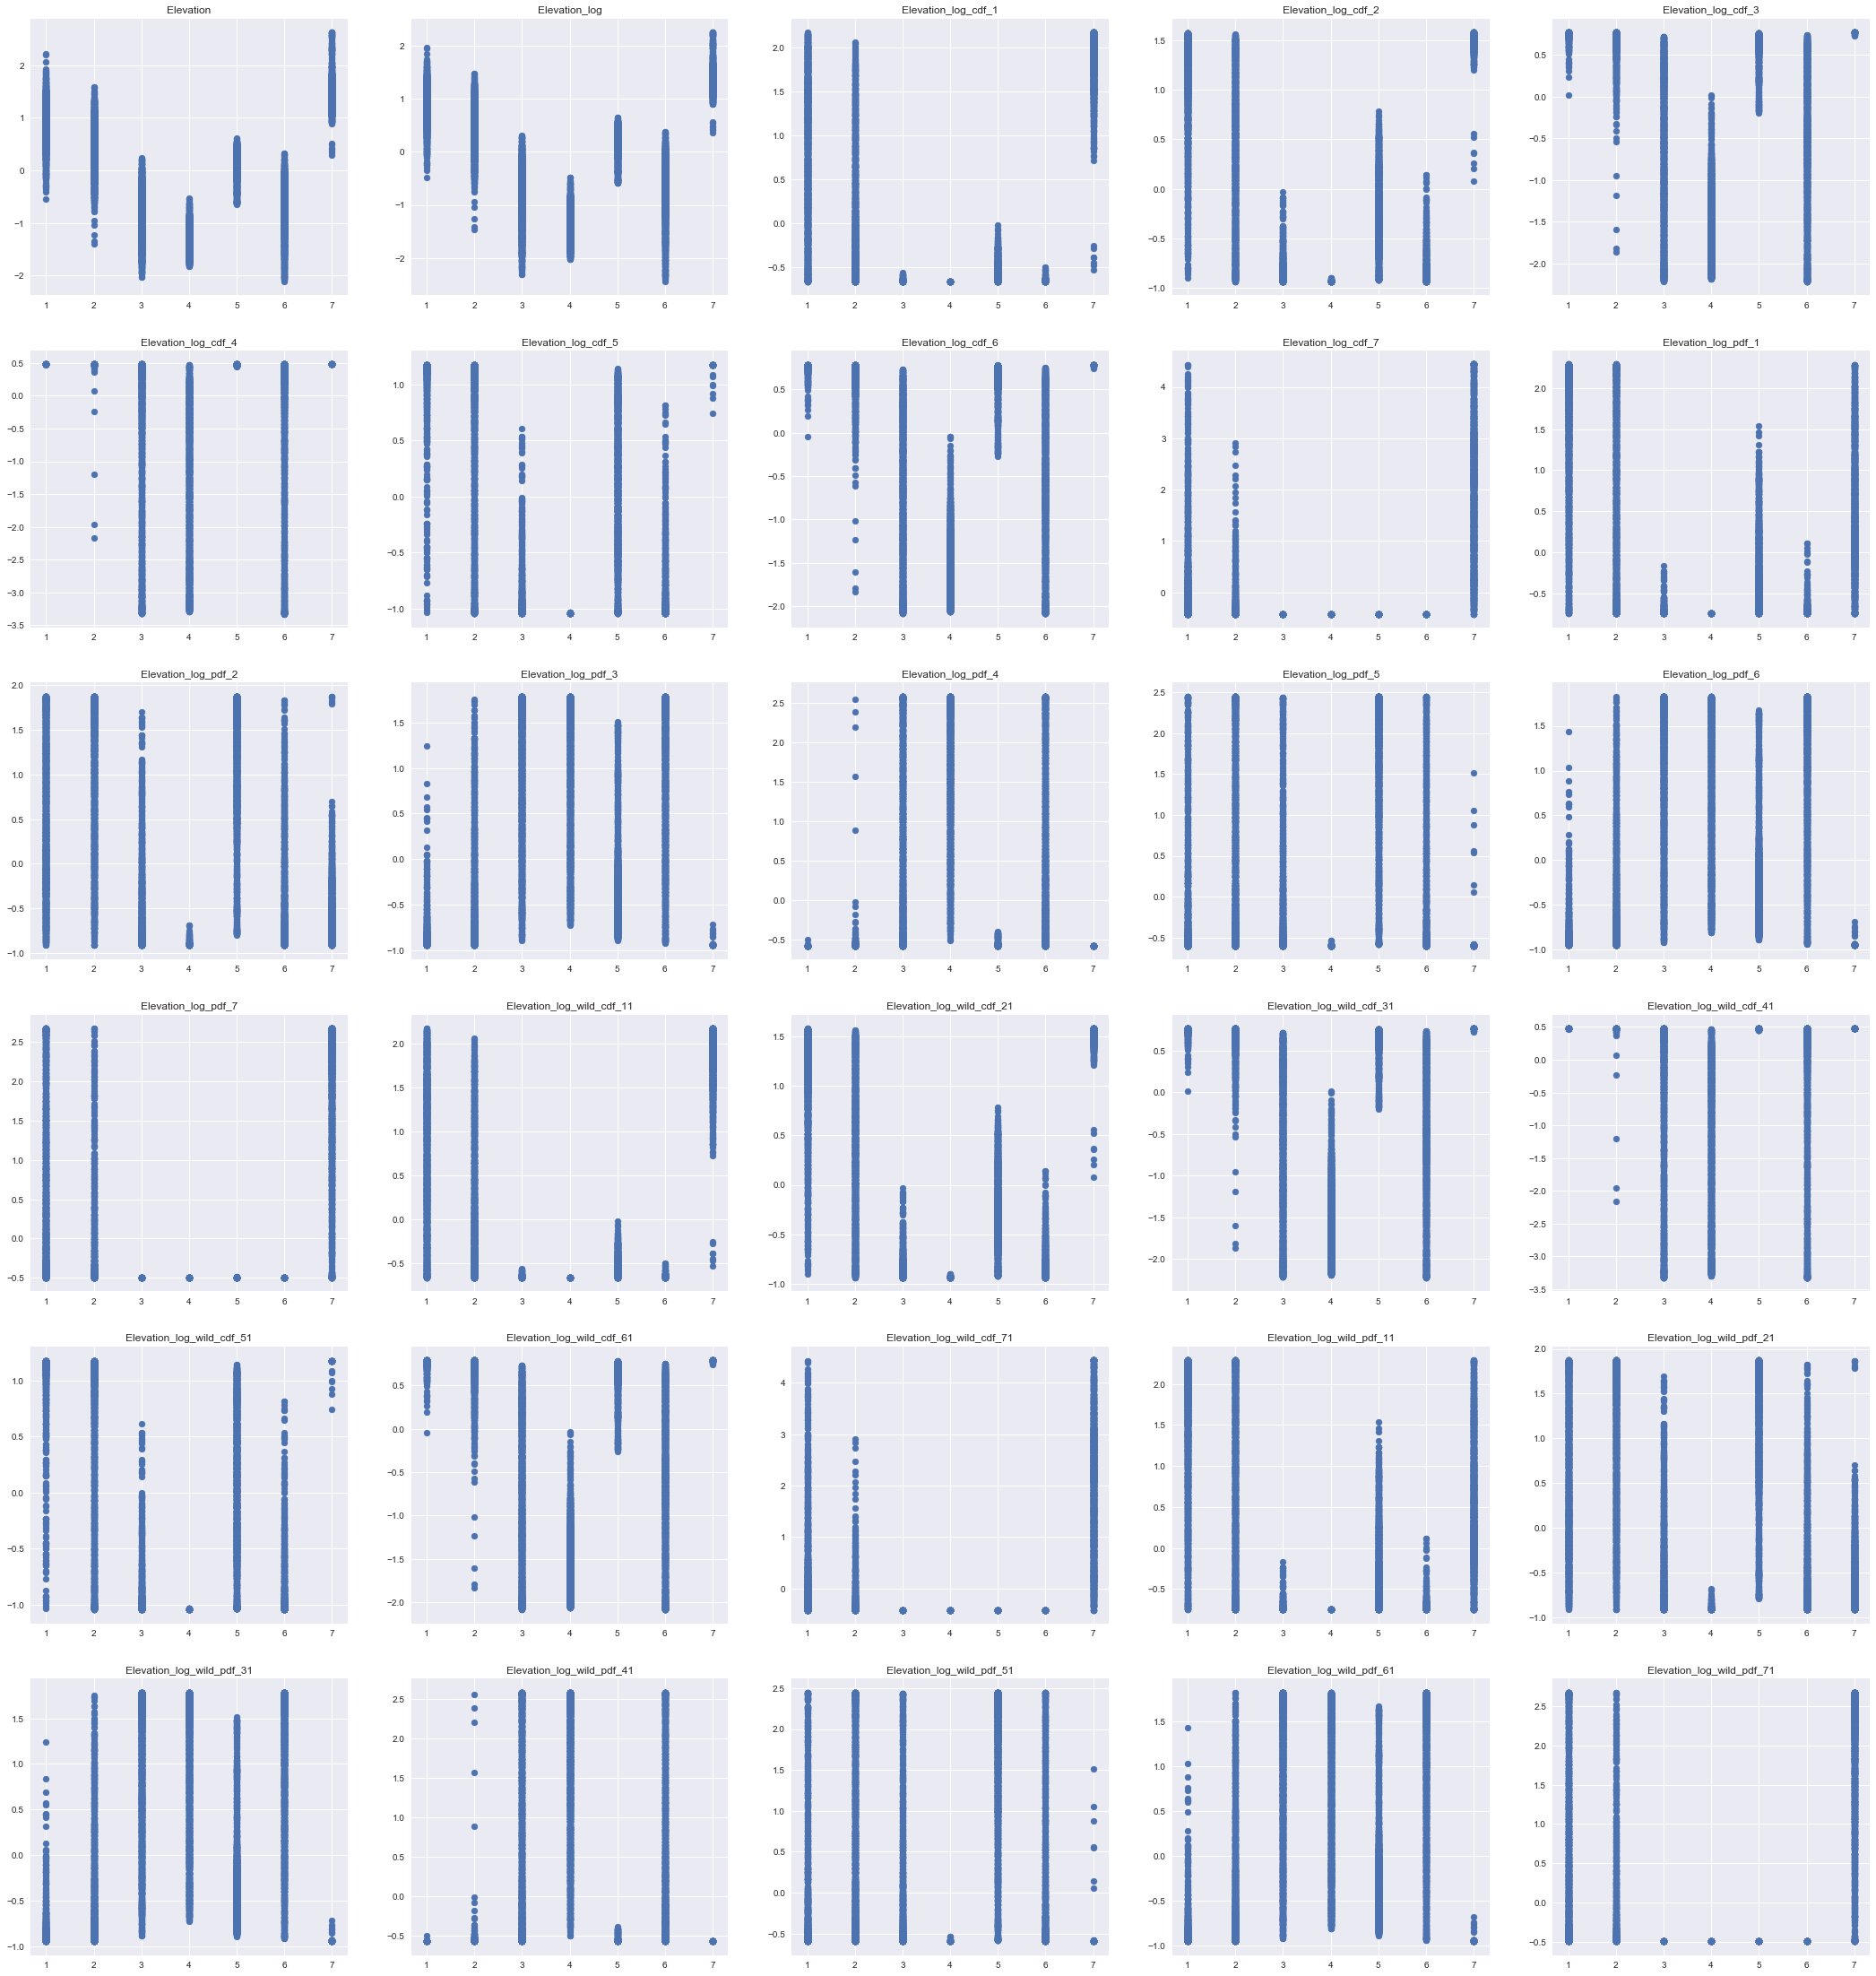

In [23]:
scatter_column_range_by_covertype(elevation_rel_cols, rows=6)

* We decide to keep all the columns related with `Elevation`

In [24]:
slope_rel_cols = ['Slope','Slope_log', 'Slope_log_cdf_1', 'Slope_log_cdf_2',
 'Slope_log_cdf_3', 'Slope_log_cdf_4', 'Slope_log_cdf_5',
 'Slope_log_cdf_6', 'Slope_log_cdf_7', 'Slope_log_pdf_1',
 'Slope_log_pdf_2', 'Slope_log_pdf_3', 'Slope_log_pdf_4',
 'Slope_log_pdf_5', 'Slope_log_pdf_6', 'Slope_log_pdf_7',
 'Slope_log_wild_cdf_11', 'Slope_log_wild_cdf_21', 'Slope_log_wild_cdf_31',
 'Slope_log_wild_cdf_41', 'Slope_log_wild_cdf_51', 'Slope_log_wild_cdf_61',
 'Slope_log_wild_cdf_71', 'Slope_log_wild_pdf_11', 'Slope_log_wild_pdf_21',
 'Slope_log_wild_pdf_31', 'Slope_log_wild_pdf_41', 'Slope_log_wild_pdf_51',
 'Slope_log_wild_pdf_61', 'Slope_log_wild_pdf_71'
]

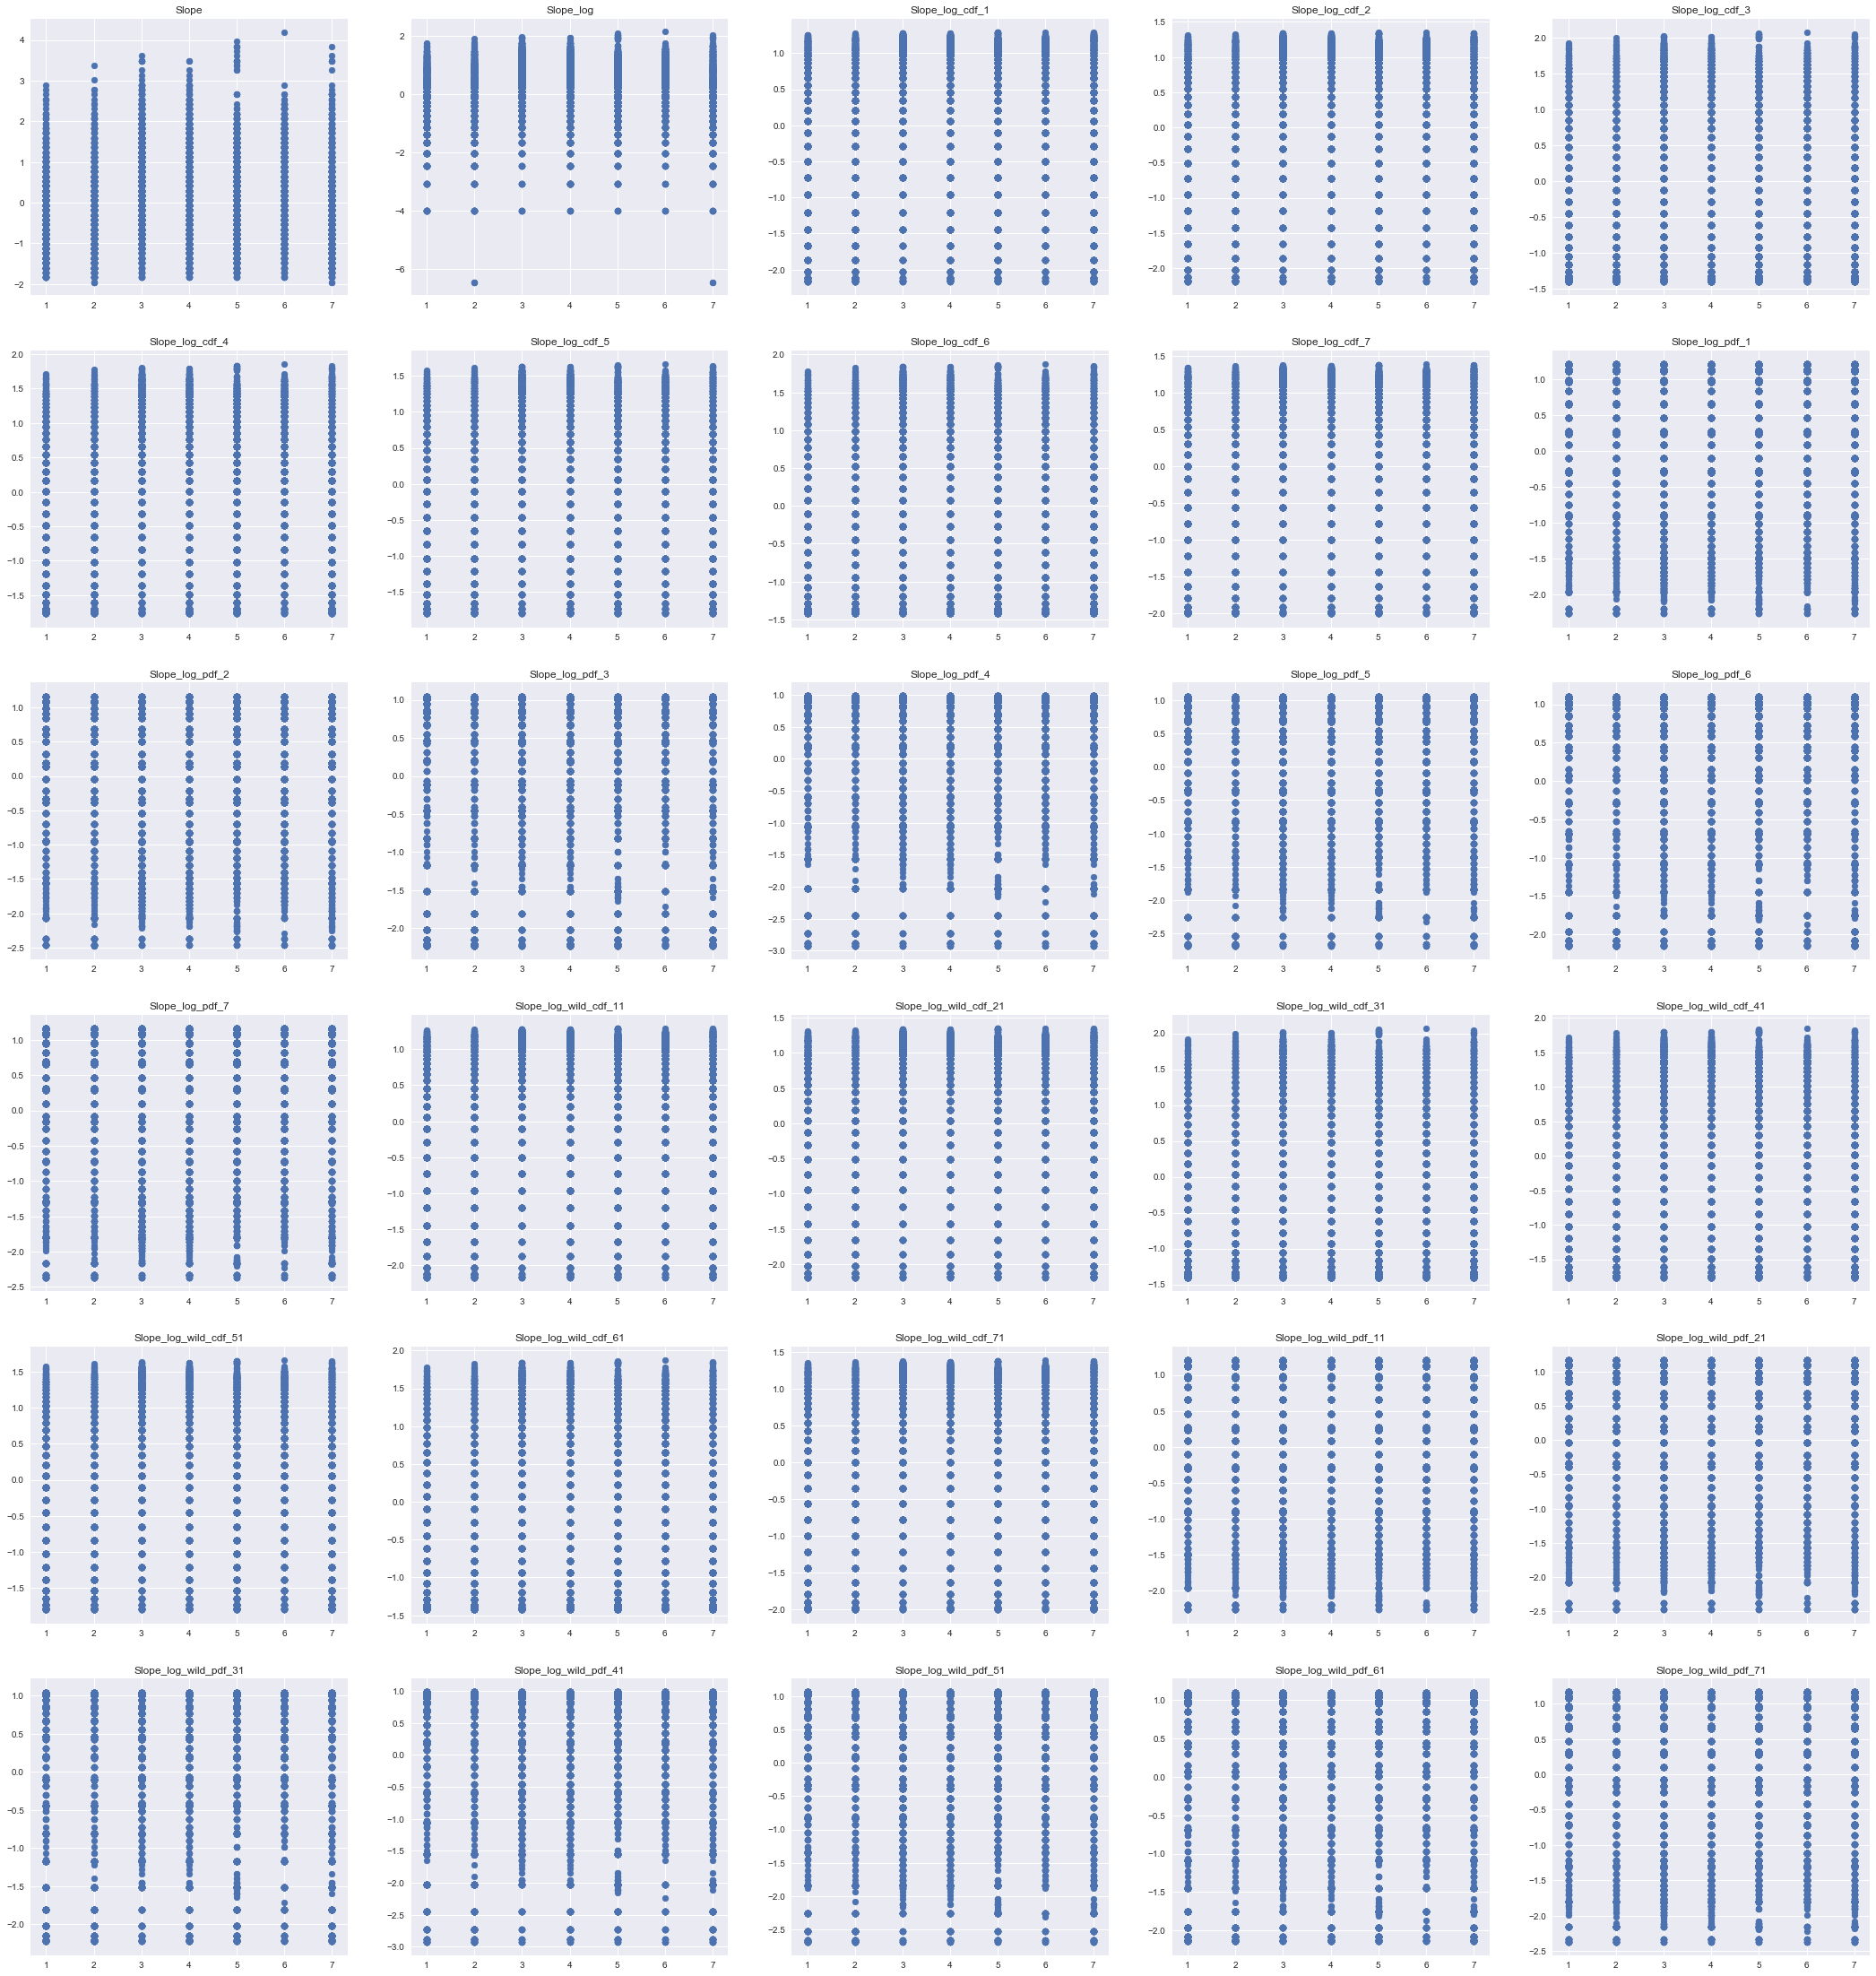

In [25]:
scatter_column_range_by_covertype(slope_rel_cols, rows=6)

In [26]:
slope_rel_cols.remove('Slope')
slope_rel_cols.remove('Slope_log')
X_scaled_train = X_scaled_train.drop(slope_rel_cols, axis=1)
X_scaled_test = X_scaled_test.drop(slope_rel_cols, axis=1)

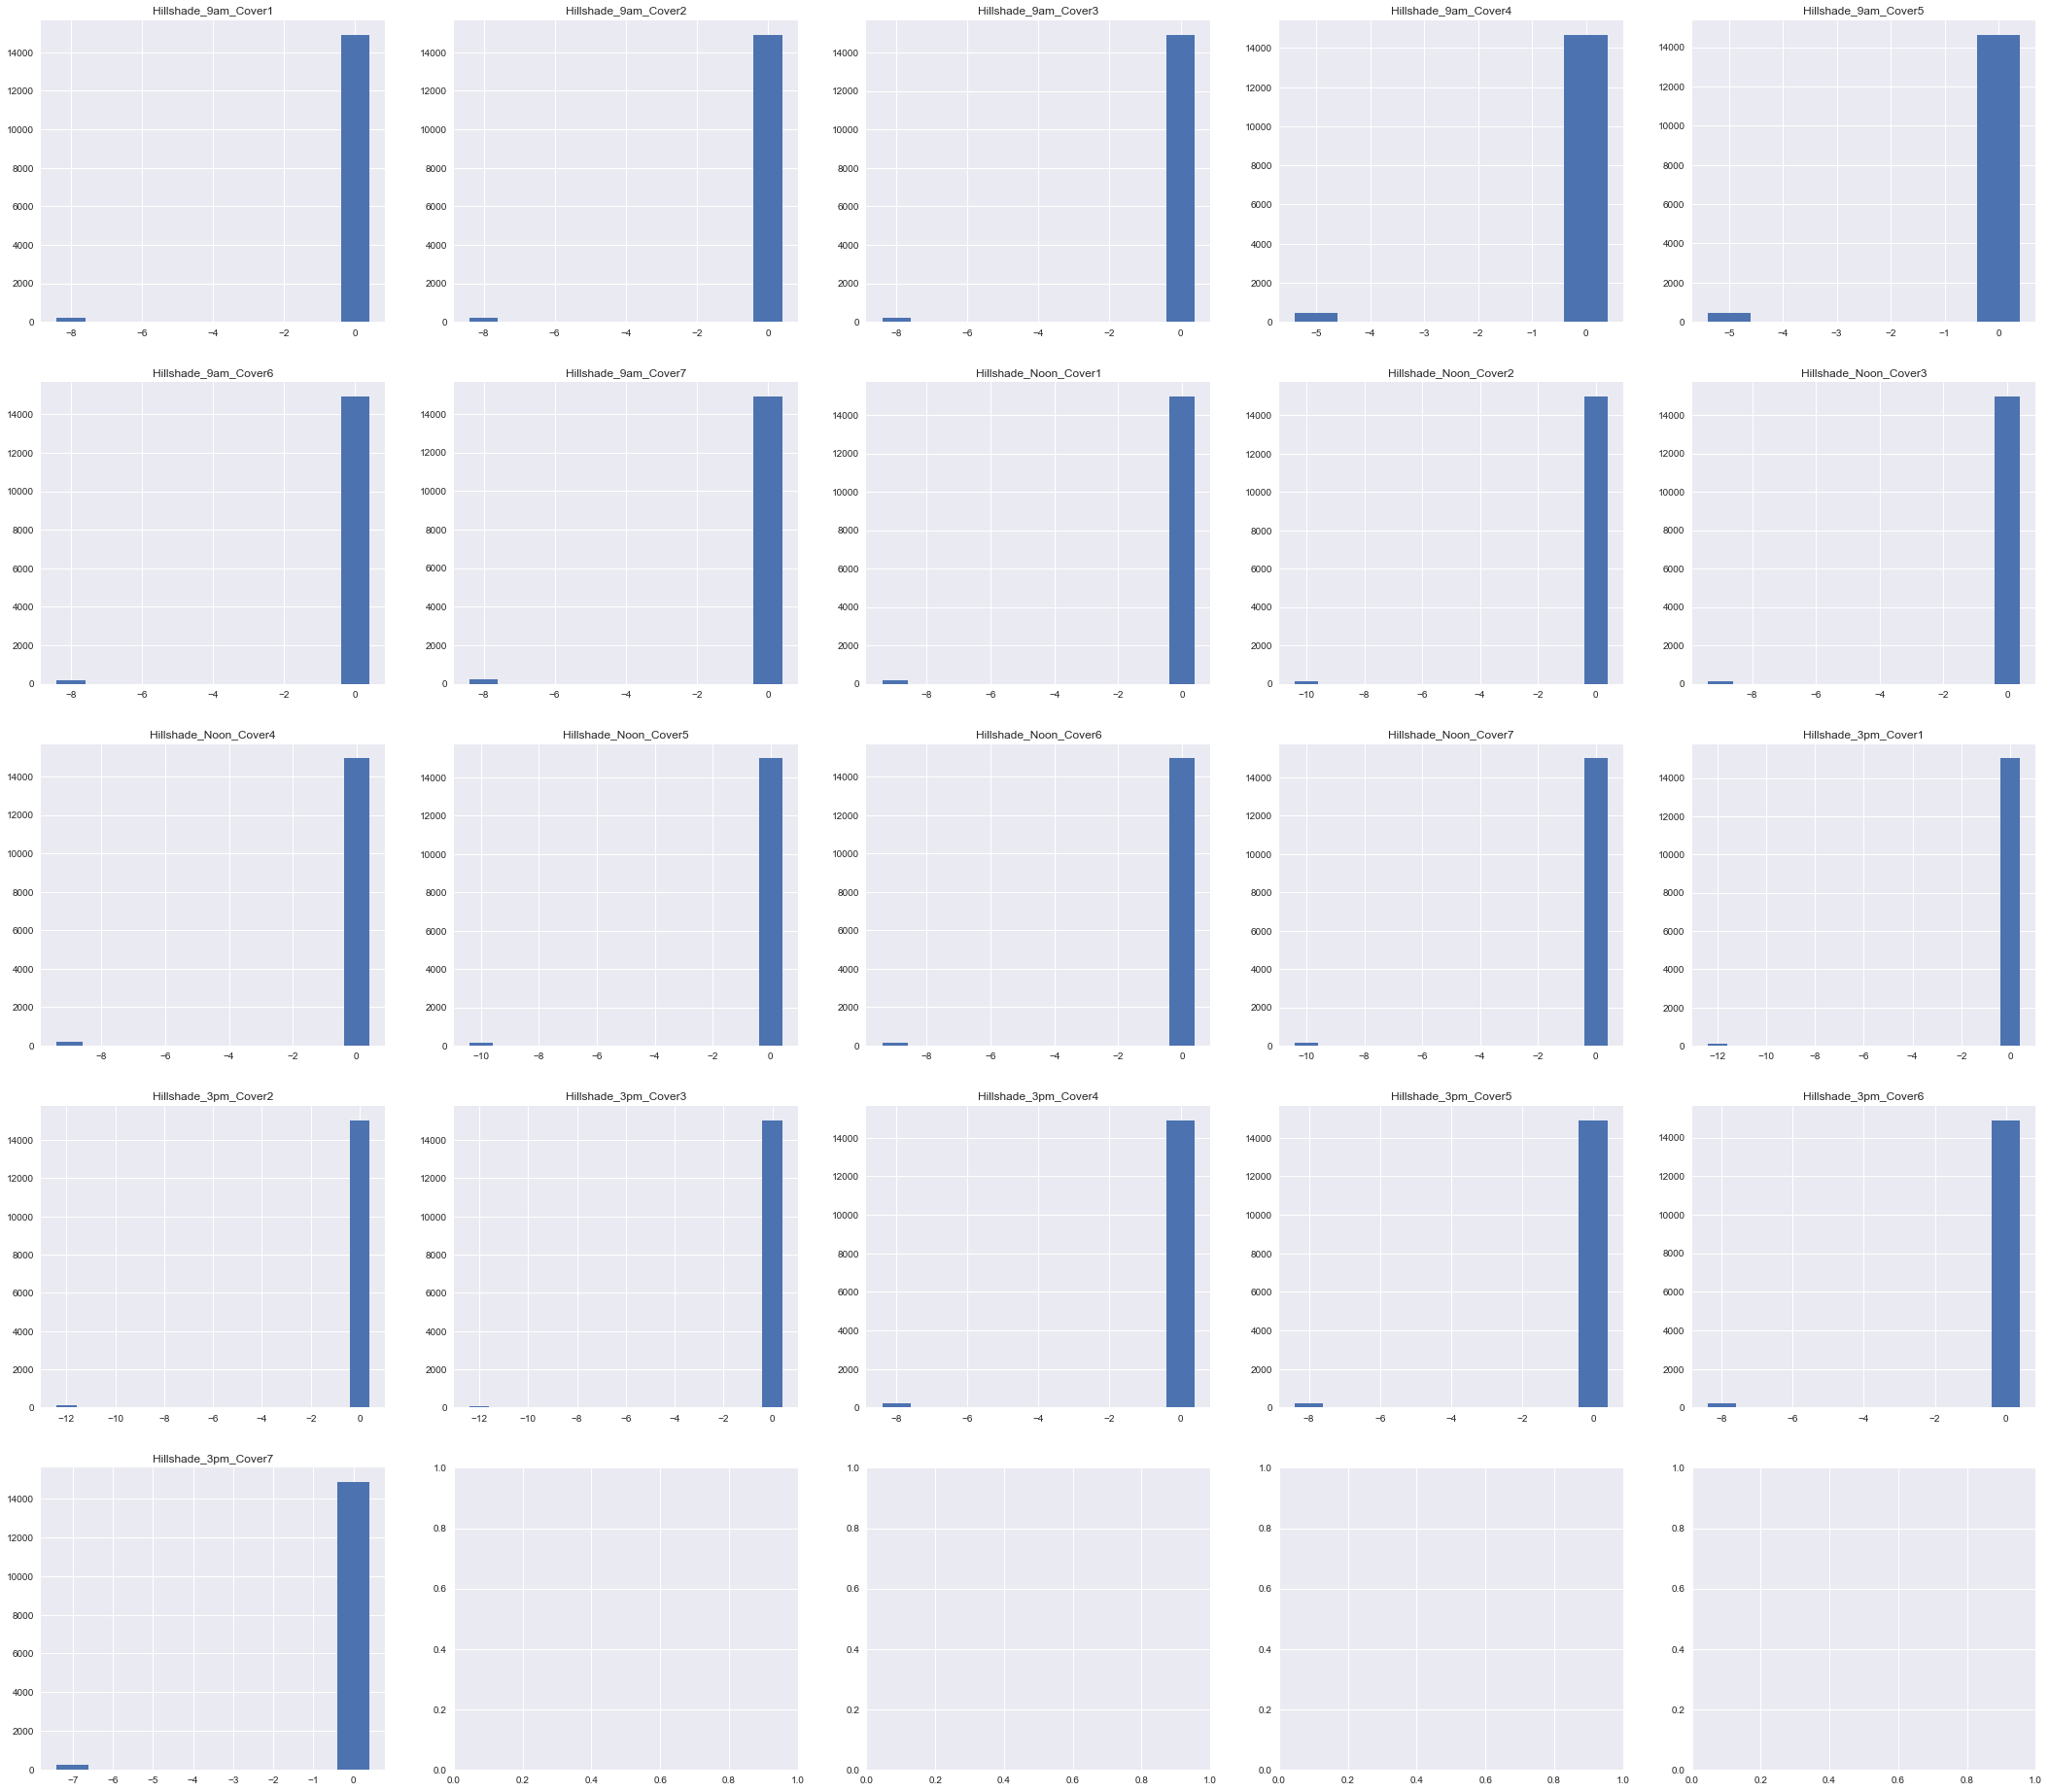

In [27]:
hillshade_cover_cols = ['Hillshade_9am_Cover1',
 'Hillshade_9am_Cover2',
 'Hillshade_9am_Cover3',
 'Hillshade_9am_Cover4',
 'Hillshade_9am_Cover5',
 'Hillshade_9am_Cover6',
 'Hillshade_9am_Cover7',
 'Hillshade_Noon_Cover1',
 'Hillshade_Noon_Cover2',
 'Hillshade_Noon_Cover3',
 'Hillshade_Noon_Cover4',
 'Hillshade_Noon_Cover5',
 'Hillshade_Noon_Cover6',
 'Hillshade_Noon_Cover7',
 'Hillshade_3pm_Cover1',
 'Hillshade_3pm_Cover2',
 'Hillshade_3pm_Cover3',
 'Hillshade_3pm_Cover4',
 'Hillshade_3pm_Cover5',
 'Hillshade_3pm_Cover6',
 'Hillshade_3pm_Cover7']
bar_column_range_by_covertype(hillshade_cover_cols, rows=5)

In [28]:
X_scaled_train = X_scaled_train.drop(hillshade_cover_cols, axis=1)
X_scaled_test = X_scaled_test.drop(hillshade_cover_cols, axis=1)

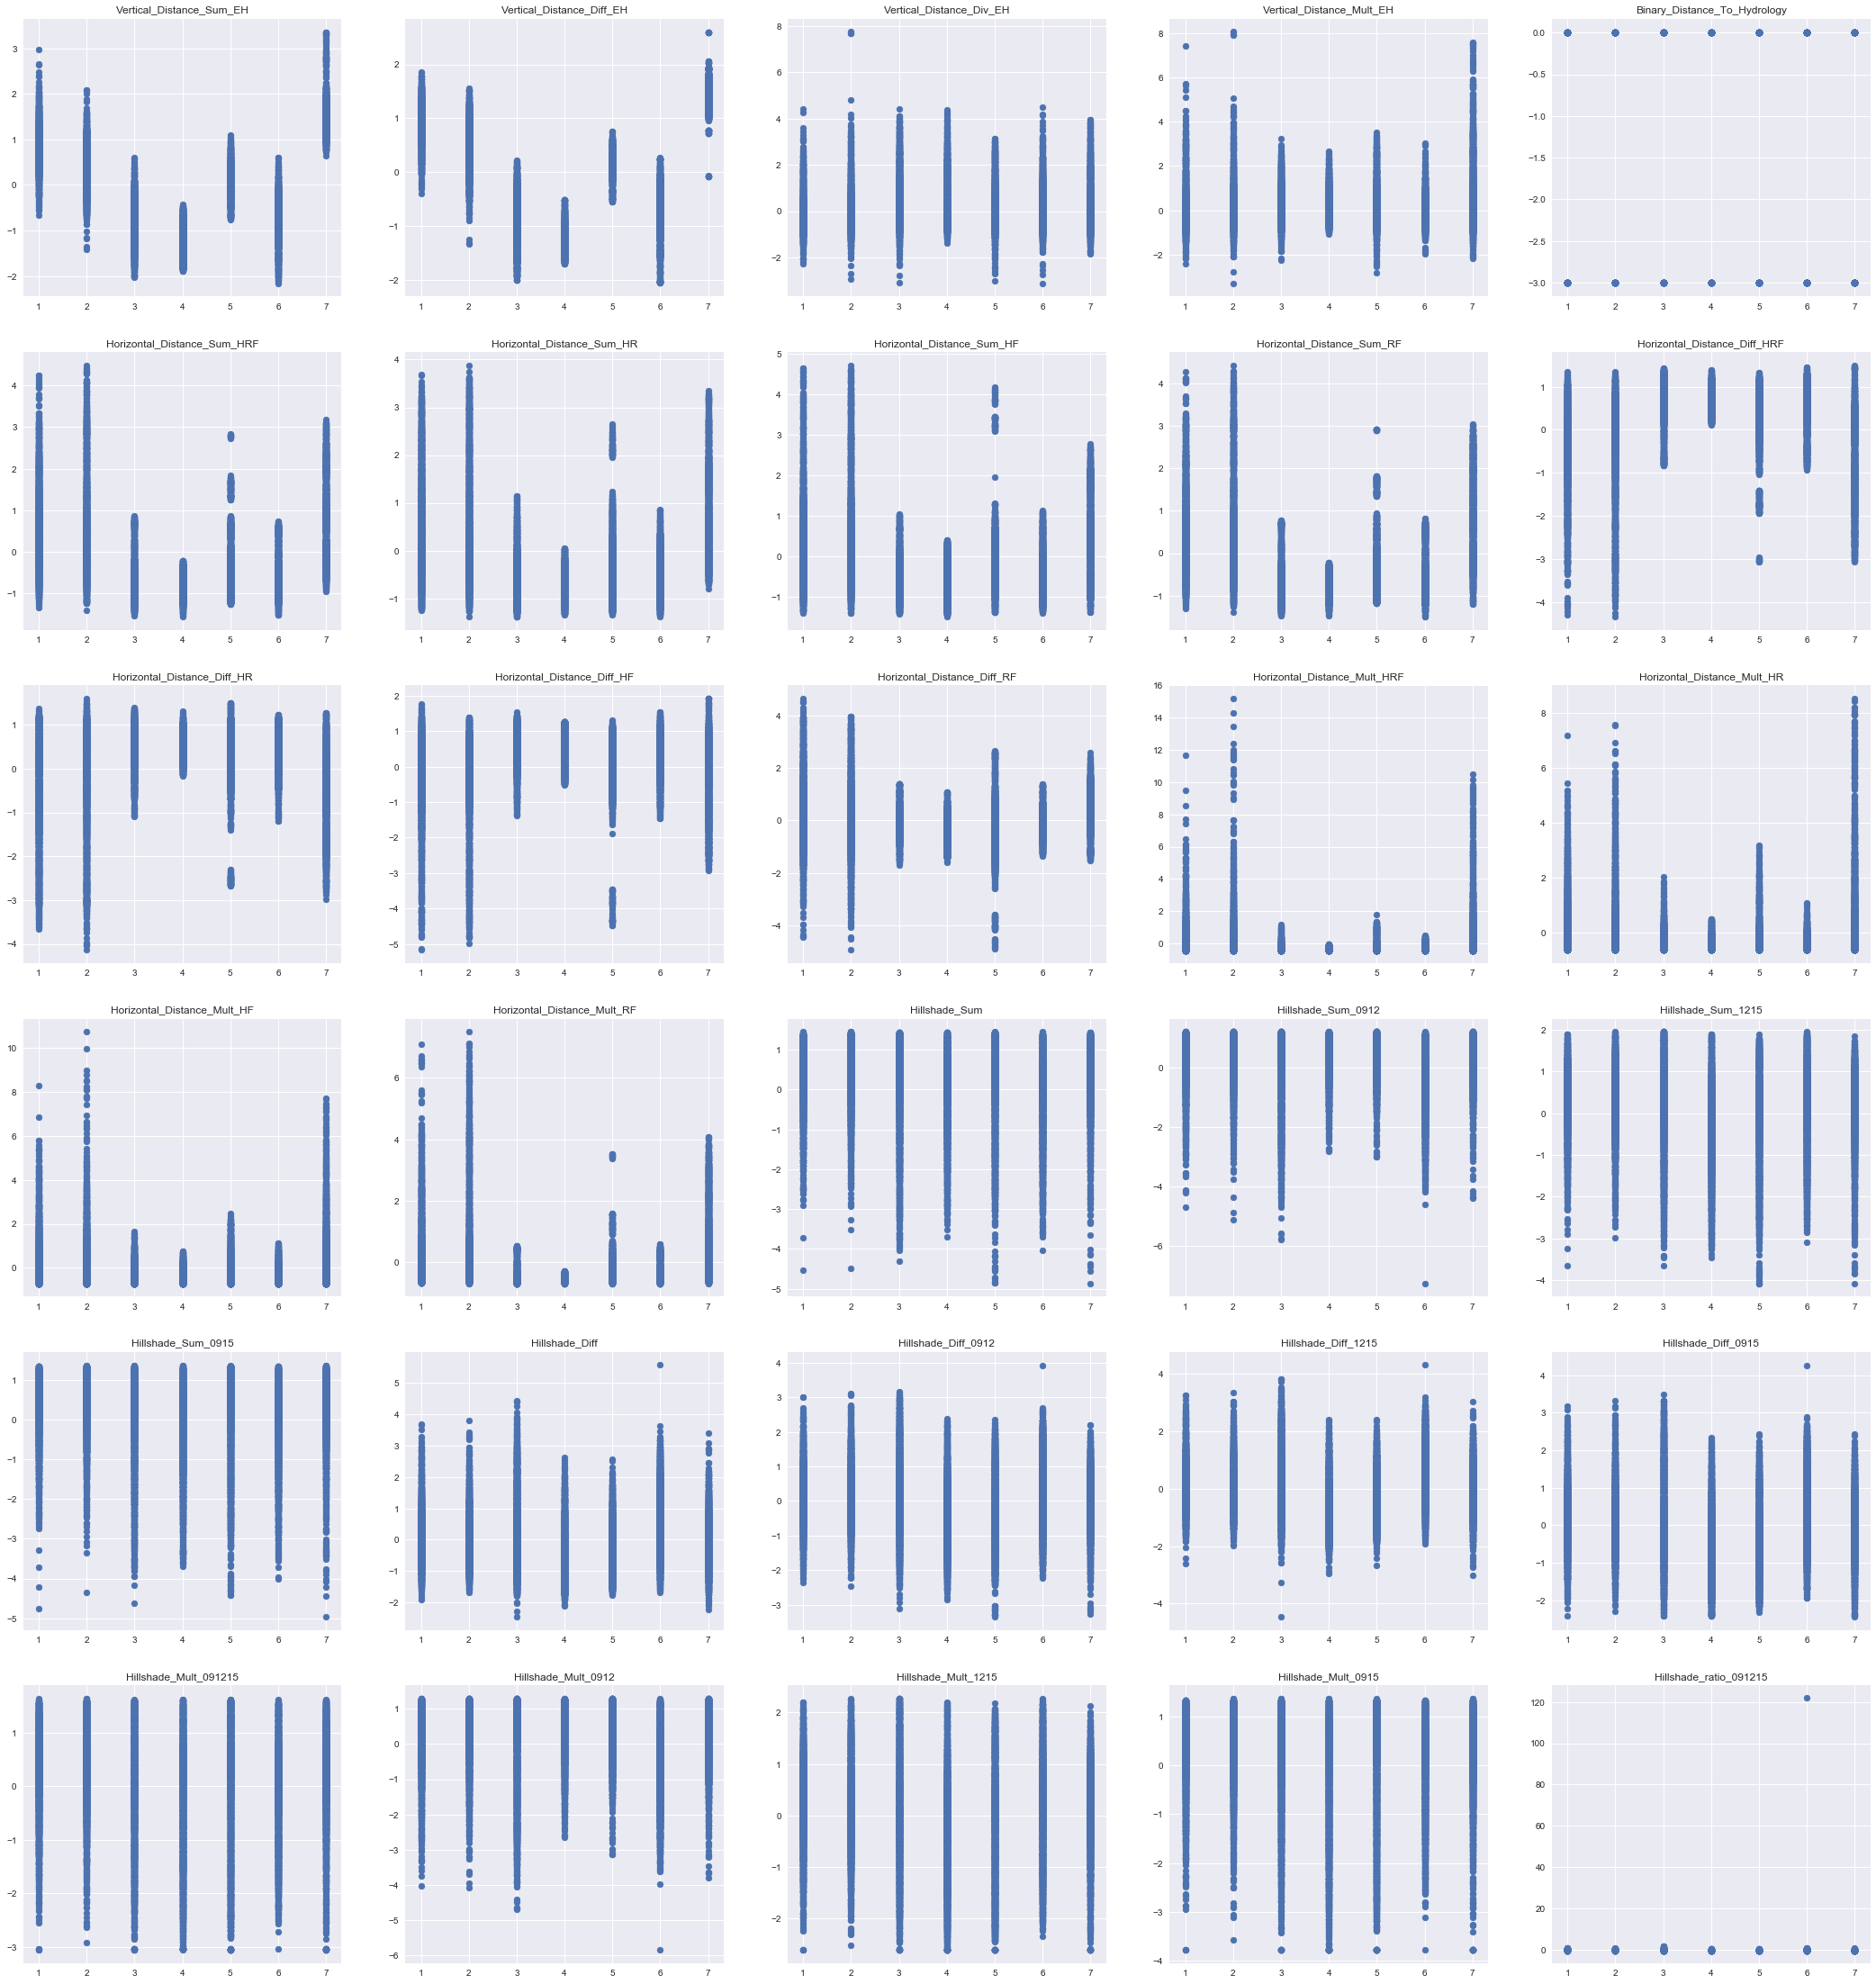

In [29]:
scatter_column_range_by_covertype(X_scaled_train.columns.tolist()[143:173], rows=6)

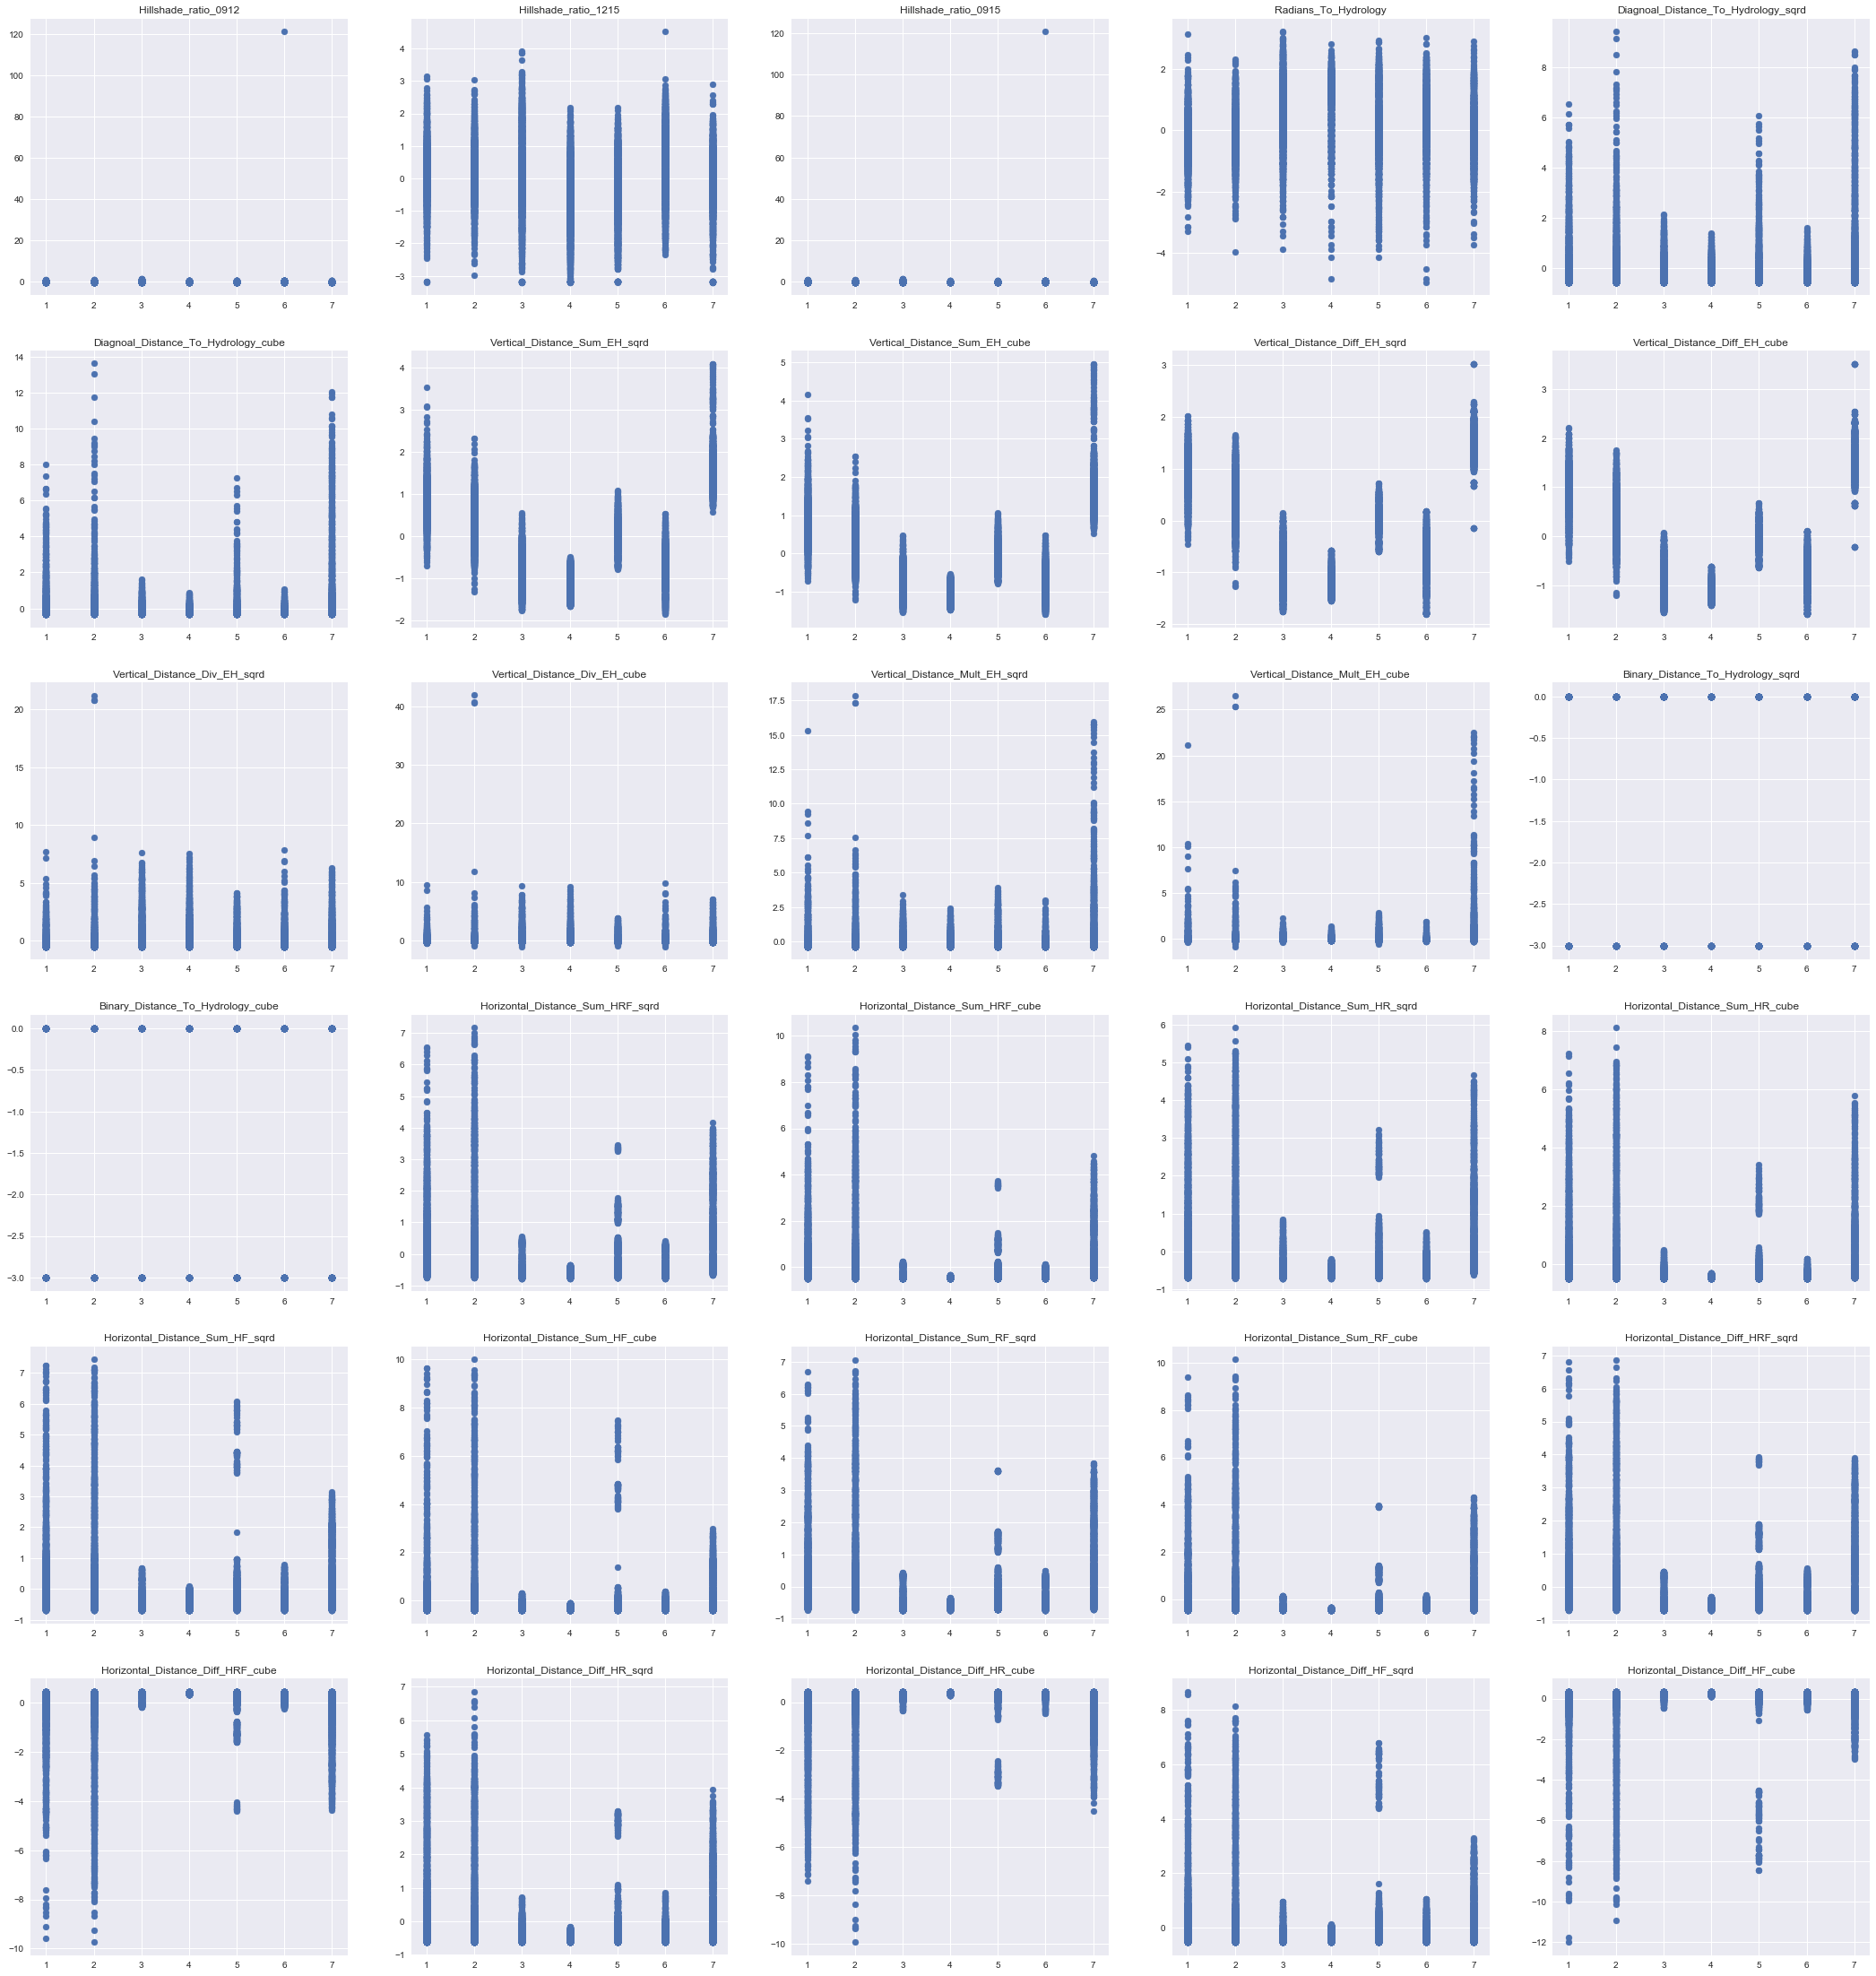

In [30]:
scatter_column_range_by_covertype(X_scaled_train.columns.tolist()[173:203], rows=6)

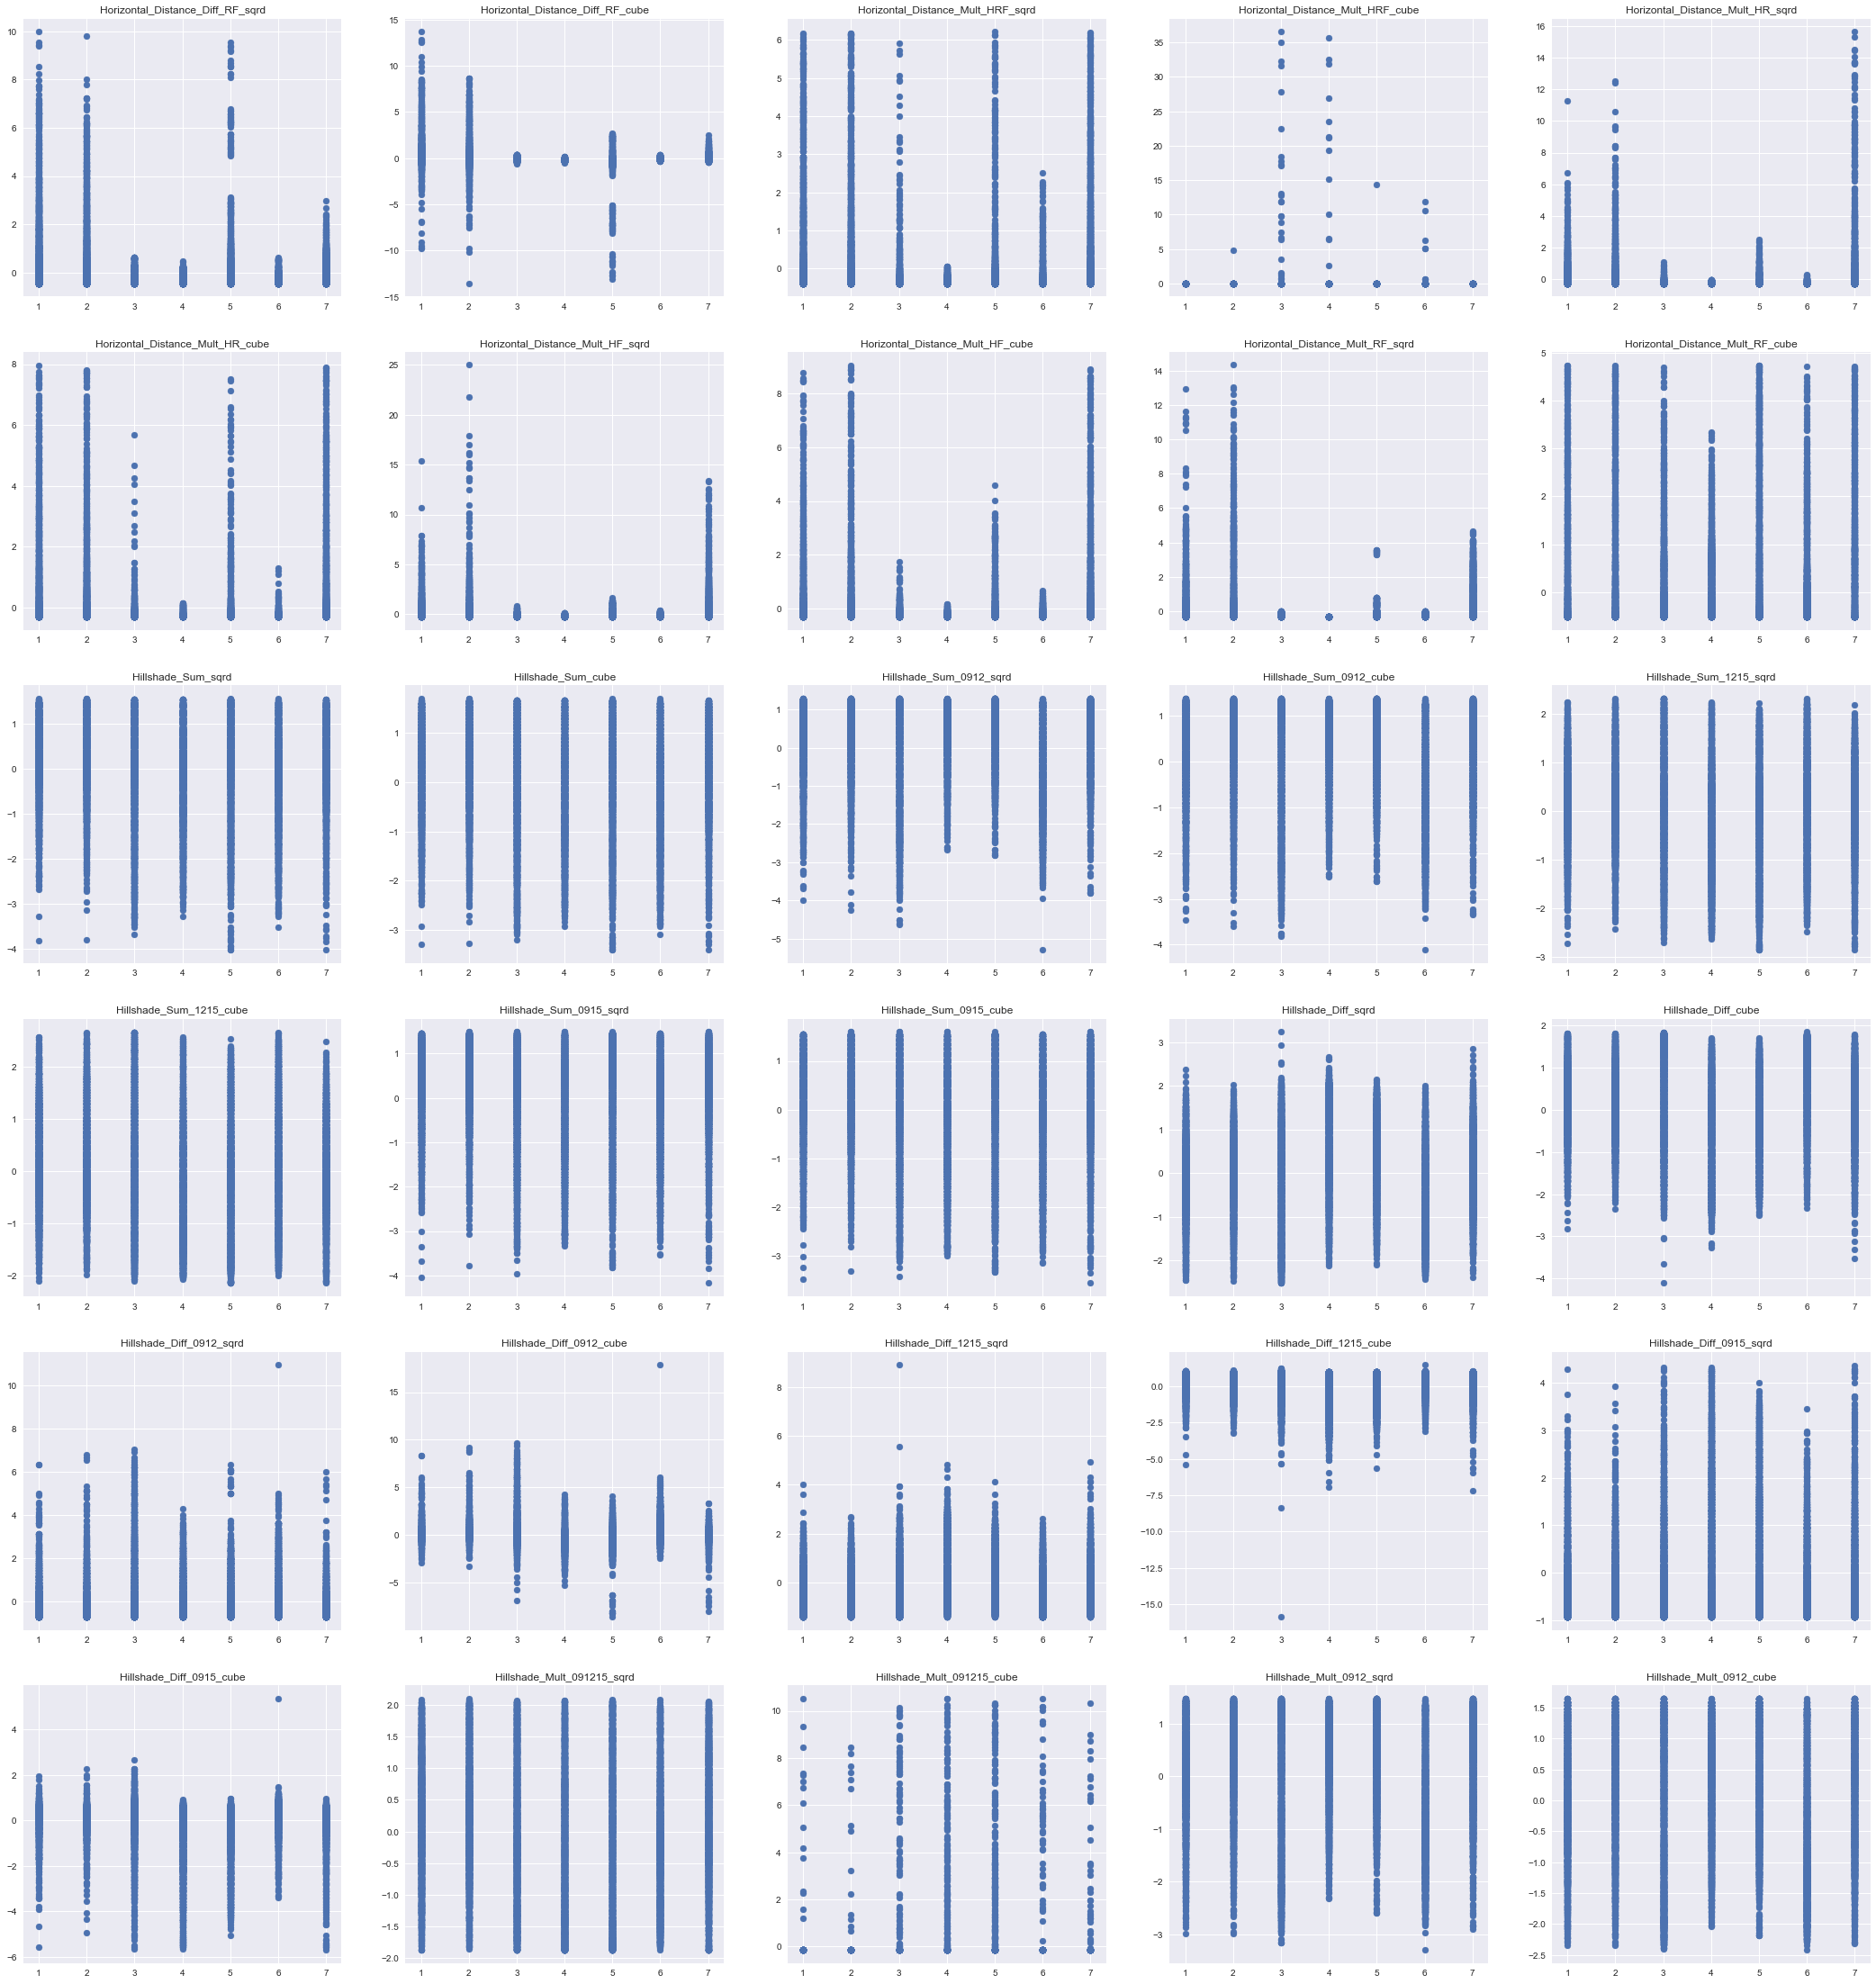

In [31]:
scatter_column_range_by_covertype(X_scaled_train.columns.tolist()[203:233], rows=6)

In [32]:
cols_to_drop = ['Hillshade_Mult_091215','Hillshade_Mult_1215','Hillshade_Mult_0915',
               'Hillshade_Mult_091215_sqrd', 'Hillshade_Mult_1215_sqrd', 'Hillshade_Mult_0915_sqrd',
               'Hillshade_Mult_091215_cube', 'Hillshade_Mult_1215_cube', 'Hillshade_Mult_0915_cube']
X_scaled_train = X_scaled_train.drop(cols_to_drop, axis=1)
X_scaled_test = X_scaled_test.drop(cols_to_drop, axis=1)

In [33]:
len(X_scaled_train.columns)

238

## Additional Feature Generation
**Concatenation with binary columns**
* We can also generate combined binary columns from many binary columns just like adding conditions

#### Example (combined binary column = `pclass_sex`)
pclass|sex|**pclass_sex**
---|---|---
3|male|**3male**
1|female|**1female**
3|female|**3female**
1|female|**1female**


In [34]:
# since we convert binary columns datatype to integer
binary_columns = X_scaled_test.select_dtypes(include=['integer']).columns

In [35]:
binary_columns

Index(['Soil_Type1', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type16', 'Soil_Type17',
       'Soil_Type18', 'Soil_Type19', 'Soil_Type2', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type3', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type4', 'Soil_Type40', 'Soil_Type5', 'Soil_Type6', 'Soil_Type8',
       'Soil_Type9', 'Wilderness_Area1', 'Wilderness_Area2',
       'Wilderness_Area3', 'Wilderness_Area4', 'Slope_Direction_1',
       'Slope_Direction_2', 'Slope_Direction_3', 'Slope_Direction_4',
       'Slope_Direction_5', 'Slope_Direction_6', 'Slope_Direction_7',
       'Slope_Direction_8', 'Soils_Cover1', 'Soils_Cover2', 'Soils_Cover3',
       'Soils_Cover4', 'Soils_Cover5', 'Soil

### Combinations to generate

* `Elevation_Cover[1-7] + Wilderness_Area[1-4]
  * If this combination is proven to be effective, we will generate some more columns in this way.

In [36]:
X_scaled_train['Elevation_Cover1'].value_counts()

 0    9783
-1    5337
Name: Elevation_Cover1, dtype: int64

In [37]:
X_scaled_train['Elevation_Cover2'].value_counts()

 0    13327
-2     1793
Name: Elevation_Cover2, dtype: int64

In [38]:
X_scaled_train['Elevation_Cover3'].value_counts()

 0    8839
-1    6281
Name: Elevation_Cover3, dtype: int64

In [39]:
X_scaled_train['Elevation_Cover4'].value_counts()

0    9923
1    5197
Name: Elevation_Cover4, dtype: int64

In [40]:
X_scaled_train['Elevation_Cover5'].value_counts()

0    9477
1    5643
Name: Elevation_Cover5, dtype: int64

In [41]:
X_scaled_train['Elevation_Cover6'].value_counts()

 0    9251
-1    5869
Name: Elevation_Cover6, dtype: int64

In [42]:
X_scaled_train['Elevation_Cover7'].value_counts()

0    9108
1    6012
Name: Elevation_Cover7, dtype: int64

In [43]:
# combining 7 binary columns

X_scaled_train['Elevation_Cover'] =\
    X_scaled_train['Elevation_Cover1'].map({0:0, -1:1})+\
    X_scaled_train['Elevation_Cover2'].map({0:0, -2:1})+\
    X_scaled_train['Elevation_Cover3'].map({0:0, -1:1})+\
    X_scaled_train['Elevation_Cover4'].map({0:0, 1:1})+\
    X_scaled_train['Elevation_Cover5'].map({0:0, 1:1})+\
    X_scaled_train['Elevation_Cover6'].map({0:0, -1:1})+\
    X_scaled_train['Elevation_Cover7'].map({0:0, 1:1})
    

In [44]:
X_scaled_test['Elevation_Cover'] =\
    X_scaled_test['Elevation_Cover1'].map({0:0, -1:1})+\
    X_scaled_test['Elevation_Cover2'].map({0:0, -2:1})+\
    X_scaled_test['Elevation_Cover3'].map({0:0, -1:1})+\
    X_scaled_test['Elevation_Cover4'].map({0:0, 1:1})+\
    X_scaled_test['Elevation_Cover5'].map({0:0, 1:1})+\
    X_scaled_test['Elevation_Cover6'].map({0:0, -1:1})+\
    X_scaled_test['Elevation_Cover7'].map({0:0, 1:1})

In [45]:
X_scaled_train['Elevation_Cover_Wilderness'] = X_scaled_train['Elevation_Cover'] + X_scaled_train['Wilderness_Area']
X_scaled_test['Elevation_Cover_Wilderness'] = X_scaled_test['Elevation_Cover'] + X_scaled_test['Wilderness_Area']

In [46]:
X_scaled_train.shape

(15120, 240)

In [49]:
X_scaled_test.shape

(565892, 240)

In [ ]:
X_scaled_train.to_csv('data/X_scaled_train.csv', index=False)
X_scaled_test.to_csv('data/X_scaled_test.csv', index=False)

# Extract Feature Ranking using `sklearn.feature_selection.RFECV`
* RandomForest
* ExtraTreesClassifier
* XGBoost

In [50]:
rf = RandomForestClassifier(random_state=0)
selector_rf = RFECV(rf, cv=5)
selector_rf.fit(X_scaled_train, y_train.values.ravel())

RFECV(cv=5,
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [51]:
etc = ExtraTreesClassifier(random_state=0)
selector_etc = RFECV(etc, cv=5)
selector_etc.fit(X_scaled_train, y_train.values.ravel())

RFECV(cv=5,
   estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [52]:
etc_ent = ExtraTreesClassifier(random_state=0, criterion='entropy')
selector_etc_ent = RFECV(etc_ent, cv=5)
selector_etc_ent.fit(X_scaled_train, y_train.values.ravel())

RFECV(cv=5,
   estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [58]:
rf_rfecv_cols = X_scaled_train.columns[selector_rf.support_].tolist()
etc_gini_rfecv_cols = X_scaled_train.columns[selector_etc.support_].tolist()
etc_ent_rfecv_cols = X_scaled_train.columns[selector_etc_ent.support_].tolist()

In [61]:
len(rf_rfecv_cols), len(etc_gini_rfecv_cols), len(etc_ent_rfecv_cols)

(44, 87, 109)

In [64]:
rf_rfecv_cols

['Aspect_log',
 'Elevation',
 'Elevation_log',
 'Elevation_log_cdf_2',
 'Elevation_log_cdf_3',
 'Elevation_log_cdf_6',
 'Elevation_log_wild_cdf_51',
 'Elevation_log_wild_cdf_61',
 'Hillshade_Noon_log',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Roadways_log',
 'Soil_Type',
 'Aspect_sqrd',
 'Horizontal_Distance_To_Roadways_cube',
 'Horizontal_Distance_To_Fire_Points_sqrd',
 'Diagnoal_Distance_To_Hydrology',
 'Vertical_Distance_Diff_EH',
 'Vertical_Distance_Div_EH',
 'Horizontal_Distance_Sum_HF',
 'Horizontal_Distance_Diff_HRF',
 'Horizontal_Distance_Diff_HR',
 'Horizontal_Distance_Diff_HF',
 'Horizontal_Distance_Diff_RF',
 'Hillshade_Sum_0912',
 'Hillshade_Mult_0912',
 'Diagnoal_Distance_To_Hydrology_sqrd',
 'Diagnoal_Distance_To_Hydrology_cube',
 'Vertical_Distance_Diff_EH_sqrd',
 'Vertical_Distance_Diff_EH_cube',
 'Horizontal_Distance_Sum_HRF_sqrd',
 'Horizontal_Distance_Sum_HF_cube',
 'Horizontal_Distance_Sum_RF_sqrd',
 'Horizontal_Distance_Sum_RF_cube',
 'Horizonta

In [62]:
etc_gini_rfecv_cols

['Aspect',
 'Elevation',
 'Elevation_log',
 'Elevation_log_cdf_2',
 'Elevation_log_cdf_3',
 'Elevation_log_cdf_6',
 'Elevation_log_pdf_2',
 'Elevation_log_pdf_3',
 'Elevation_log_pdf_5',
 'Elevation_log_pdf_6',
 'Elevation_log_wild_cdf_11',
 'Elevation_log_wild_cdf_21',
 'Elevation_log_wild_cdf_31',
 'Elevation_log_wild_cdf_61',
 'Elevation_log_wild_pdf_21',
 'Elevation_log_wild_pdf_61',
 'Hillshade_9am',
 'Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Fire_Points_log',
 'Horizontal_Distance_To_Hydrology',
 'Horizontal_Distance_To_Hydrology_log',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Roadways_log',
 'Soil_Type10',
 'Vertical_Distance_To_Hydrology_log',
 'Wilderness_Area',
 'Wilderness_Area3',
 'Soil_Type',
 'Soils_Cover3',
 'Soils_Cover5',
 'Soils_Cover6',
 'Soils_Cover7',
 'Elevation_cube',
 'Aspect_sqrd',
 'Horizontal_Distance_To_Hydrology_sqrd',
 'Horizontal_Distance_To_Roadways_sqrd',
 'Horizontal_Distance_To_Roadways_cube',
 'Hillshade_9am_sq

In [63]:
etc_ent_rfecv_cols

['Aspect',
 'Elevation',
 'Elevation_log',
 'Elevation_log_cdf_1',
 'Elevation_log_cdf_2',
 'Elevation_log_cdf_3',
 'Elevation_log_cdf_5',
 'Elevation_log_cdf_6',
 'Elevation_log_pdf_1',
 'Elevation_log_pdf_2',
 'Elevation_log_pdf_3',
 'Elevation_log_pdf_6',
 'Elevation_log_wild_cdf_11',
 'Elevation_log_wild_cdf_21',
 'Elevation_log_wild_cdf_31',
 'Elevation_log_wild_cdf_51',
 'Elevation_log_wild_cdf_61',
 'Elevation_log_wild_pdf_21',
 'Elevation_log_wild_pdf_31',
 'Elevation_log_wild_pdf_61',
 'Hillshade_9am_log',
 'Hillshade_Noon',
 'Hillshade_Noon_log',
 'Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Fire_Points_log',
 'Horizontal_Distance_To_Hydrology',
 'Horizontal_Distance_To_Hydrology_log',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Roadways_log',
 'Soil_Type10',
 'Vertical_Distance_To_Hydrology',
 'Wilderness_Area',
 'Wilderness_Area1',
 'Wilderness_Area3',
 'Slope_Direction',
 'Soil_Type',
 'Soils_Cover3',
 'Soils_Cover4',
 'Soils_Cover5',
 'S

In [5]:
xgb_softmax =  XGBClassifier(random_state=0, objective='multi:softmax')
selector_xgb_softmax = RFECV(xgb_softmax, cv=5)
selector_xgb_softmax.fit(X_scaled_train, y_train.values.ravel())

RFECV(cv=5,
   estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softmax', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [6]:
xgb = XGBClassifier(random_state=0)
selector_xgb = RFECV(xgb, cv=5)
selector_xgb.fit(X_scaled_train, y_train.values.ravel())

RFECV(cv=5,
   estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [7]:
X_scaled_train.columns[selector_xgb_softmax.support_].tolist()

['Aspect',
 'Elevation',
 'Elevation_log_cdf_3',
 'Elevation_log_cdf_4',
 'Elevation_log_pdf_1',
 'Elevation_log_pdf_2',
 'Elevation_log_pdf_3',
 'Elevation_log_pdf_4',
 'Elevation_log_pdf_5',
 'Elevation_log_pdf_6',
 'Elevation_log_pdf_7',
 'Hillshade_3pm',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Slope',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type2',
 'Soil_Type20',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type27',
 'Soil_Type3',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type39',
 'Soil_Type4',
 'Soil_Type40',
 'Soil_Type5',
 'Soil_Type6',
 'Vertical_Distance_To_Hydrology',
 'Wilderness_Area',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Slope_Direction',
 'Slope_Direction_2',
 'Slope_Direction_4',
 'Slope_Direction_6',
 'Slope_Direction_7'

In [8]:
X_scaled_train.columns[selector_xgb.support_].tolist()

['Aspect',
 'Elevation',
 'Elevation_log_cdf_3',
 'Elevation_log_cdf_4',
 'Elevation_log_pdf_1',
 'Elevation_log_pdf_2',
 'Elevation_log_pdf_3',
 'Elevation_log_pdf_4',
 'Elevation_log_pdf_5',
 'Elevation_log_pdf_6',
 'Elevation_log_pdf_7',
 'Hillshade_3pm',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Slope',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type2',
 'Soil_Type20',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type27',
 'Soil_Type3',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type39',
 'Soil_Type4',
 'Soil_Type40',
 'Soil_Type5',
 'Soil_Type6',
 'Vertical_Distance_To_Hydrology',
 'Wilderness_Area',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Slope_Direction',
 'Slope_Direction_2',
 'Slope_Direction_4',
 'Slope_Direction_6',
 'Slope_Direction_7'

In [9]:
xgb_softmax_rfecv_cols = X_scaled_train.columns[selector_xgb_softmax.support_].tolist()
xgb_rfecv_cols = X_scaled_train.columns[selector_xgb.support_].tolist()

### Export selected features by each model for further convenience

In [22]:
rfecv_selected_cols = pd.DataFrame({'rf_rfecv':'/'.join(rf_rfecv_cols),
                                   'etc_gini_rfecv':'/'.join(etc_gini_rfecv_cols),
                                   'etc_ent_rfecv':'/'.join(etc_ent_rfecv_cols),
                                   'xgb_softmax_rfecv':'/'.join(xgb_softmax_rfecv_cols),
                                   'xgb_rfecv':'/'.join(xgb_rfecv_cols)}, index=[0])
rfecv_selected_cols.to_csv('data/rfecv_selected_features.csv', index=False)

In [30]:
rf_rfecv = pd.read_csv('data/rfecv_selected_features.csv', usecols=['rf_rfecv']).values[0][0].split('/')
etc_gini_rfecv = pd.read_csv('data/rfecv_selected_features.csv', usecols=['etc_gini_rfecv']).values[0][0].split('/')
etc_ent_rfecv = pd.read_csv('data/rfecv_selected_features.csv', usecols=['etc_ent_rfecv']).values[0][0].split('/')
xgb_softmax_rfecv = pd.read_csv('data/rfecv_selected_features.csv', usecols=['xgb_softmax_rfecv']).values[0][0].split('/')
xgb_rfecv = pd.read_csv('data/rfecv_selected_features.csv', usecols=['xgb_rfecv']).values[0][0].split('/')